<a href="https://colab.research.google.com/github/MatheusABomfim/Qualifica-o_ML_HTLV/blob/main/MEST_HTLV%2BMBL2%2BCLINICAL_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the packages**

In [ ]:
# Att Scikit-learn
!pip install scikit-learn
# Install shap
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Import data and packages for work:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score,roc_curve, auc, make_scorer, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
import pandas as pd
from scipy.stats import skew, kurtosis
import shutil
import os
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
#import shap
warnings.filterwarnings('ignore')

# **Explainable IA**

# **Importing data**

**Importing model**

In [ ]:
# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="sag", random_state=42),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state = 42,
                           criterion ='gini',
                           splitter='random',
                           max_features='log2',
                           min_samples_split= 5,
                           max_depth= 5,
                           min_samples_leaf= 5),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression*',
    'Nearest Neighbors',
    'Decision Tree*',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
]

**Importing df**

In [ ]:
# Caminho completo para o arquivo CSV
csv_file_path = "/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/Processed_df.csv"


# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv(csv_file_path)


In [ ]:
df.columns
df.rename(columns={'Espasticidade ou marcha espástica': 'Espasticidade'}, inplace=True)
df.rename(columns={'parestesia': 'Parestesia'}, inplace=True)
df.rename(columns={'artrose': 'Artrose'}, inplace=True)
df.rename(columns={'dificuldade de deambular': 'Dificuldade de deambular'}, inplace=True)

Separating the data frame in features and clinical outcome

In [ ]:
# Separate the variables into predictors and target variables (style);
y = df['HAM/TSP'] # Target variables;
x = df.drop('HAM/TSP', axis = 1) # Predict variables, without aim;

**Testing models**

In [ ]:
# Establishment of cross-validation and
skf = StratifiedKFold(5)

for item, nome in zip(classifiers, names):

# Testing the model
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)): # metrics
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        item.fit(x_train, y_train)
    print(f'Model {nome} successfully tested')

Model Logistic Regression* successfully tested
Model Nearest Neighbors successfully tested
Model Decision Tree* successfully tested
Model Random Forest successfully tested
Model AdaBoost successfully tested
Model Gradient Boosting successfully tested
Model Naive Bayes successfully tested
Model Linear DA successfully tested


# **Evaluation of permutation importance**

Arquivo referente ao modelo Logistic Regression* salvo com sucesso!


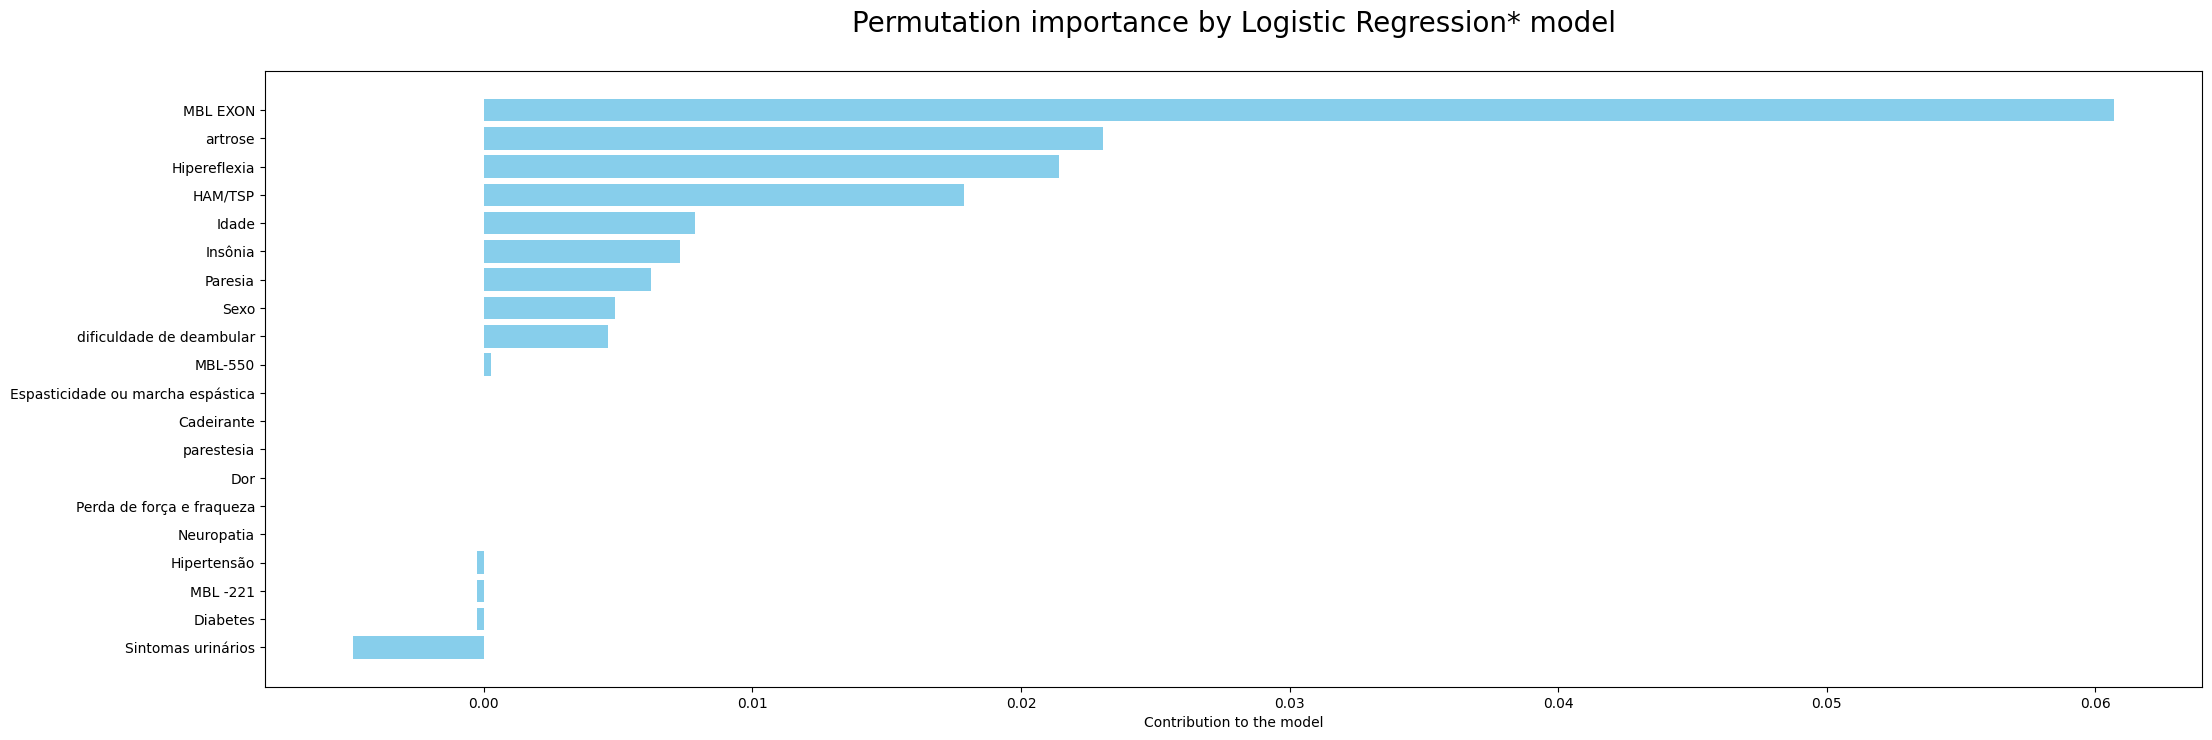

Arquivo referente ao modelo Nearest Neighbors salvo com sucesso!


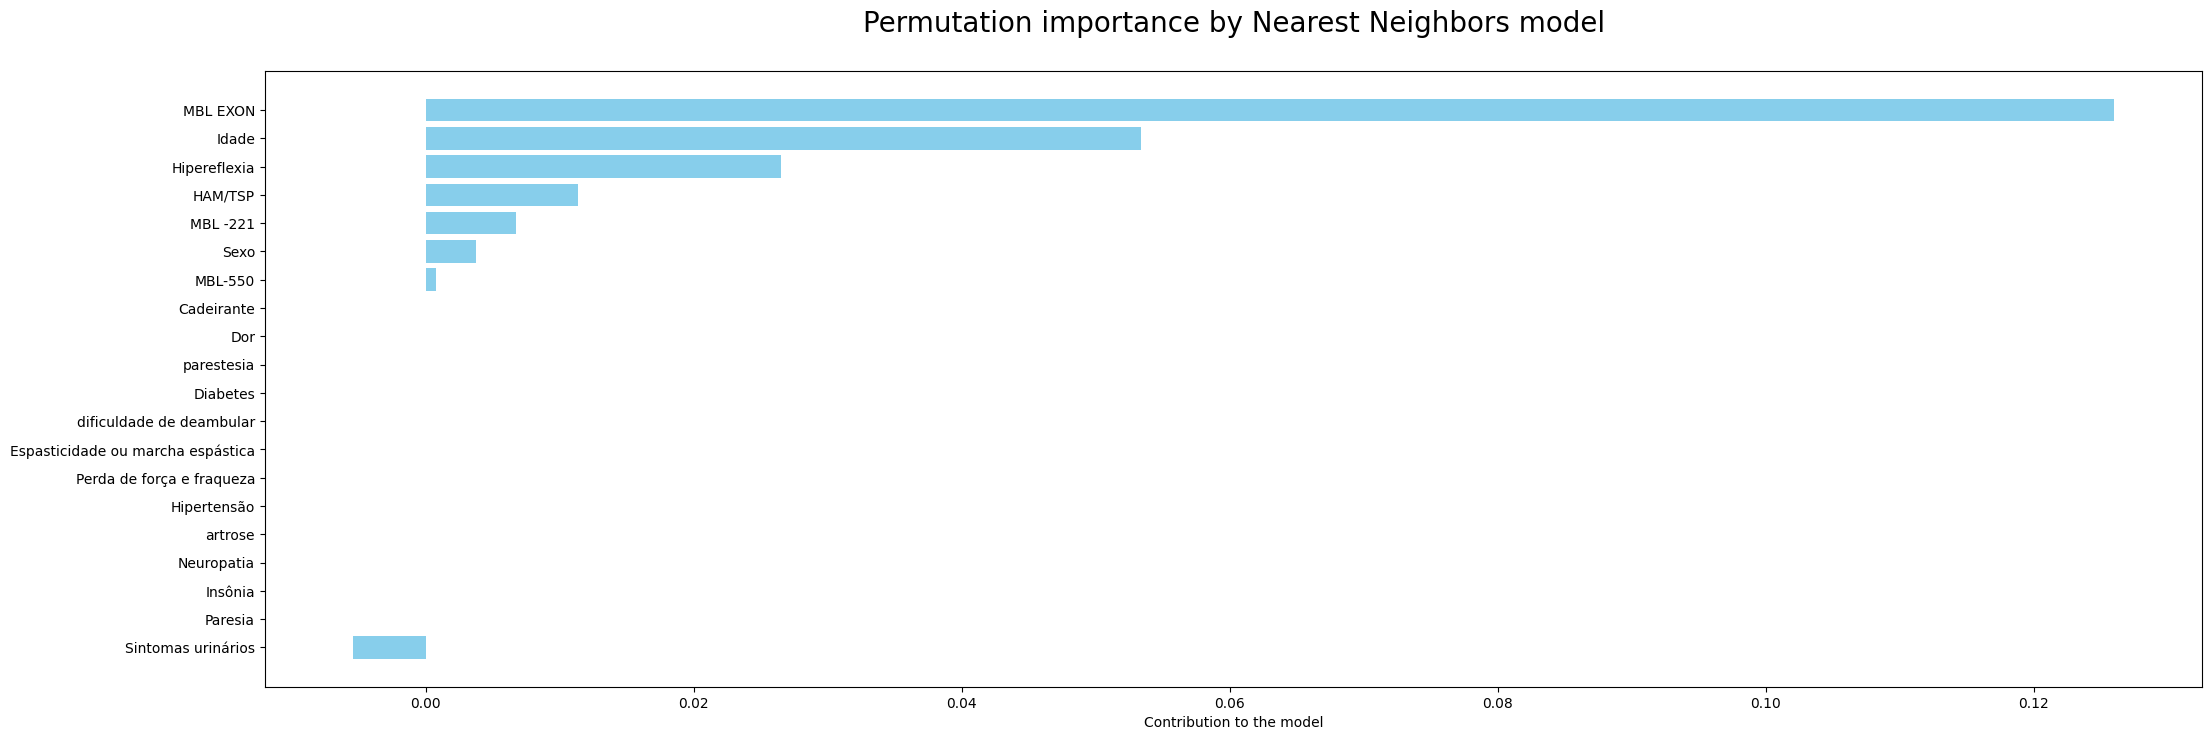

Arquivo referente ao modelo Decision Tree* salvo com sucesso!


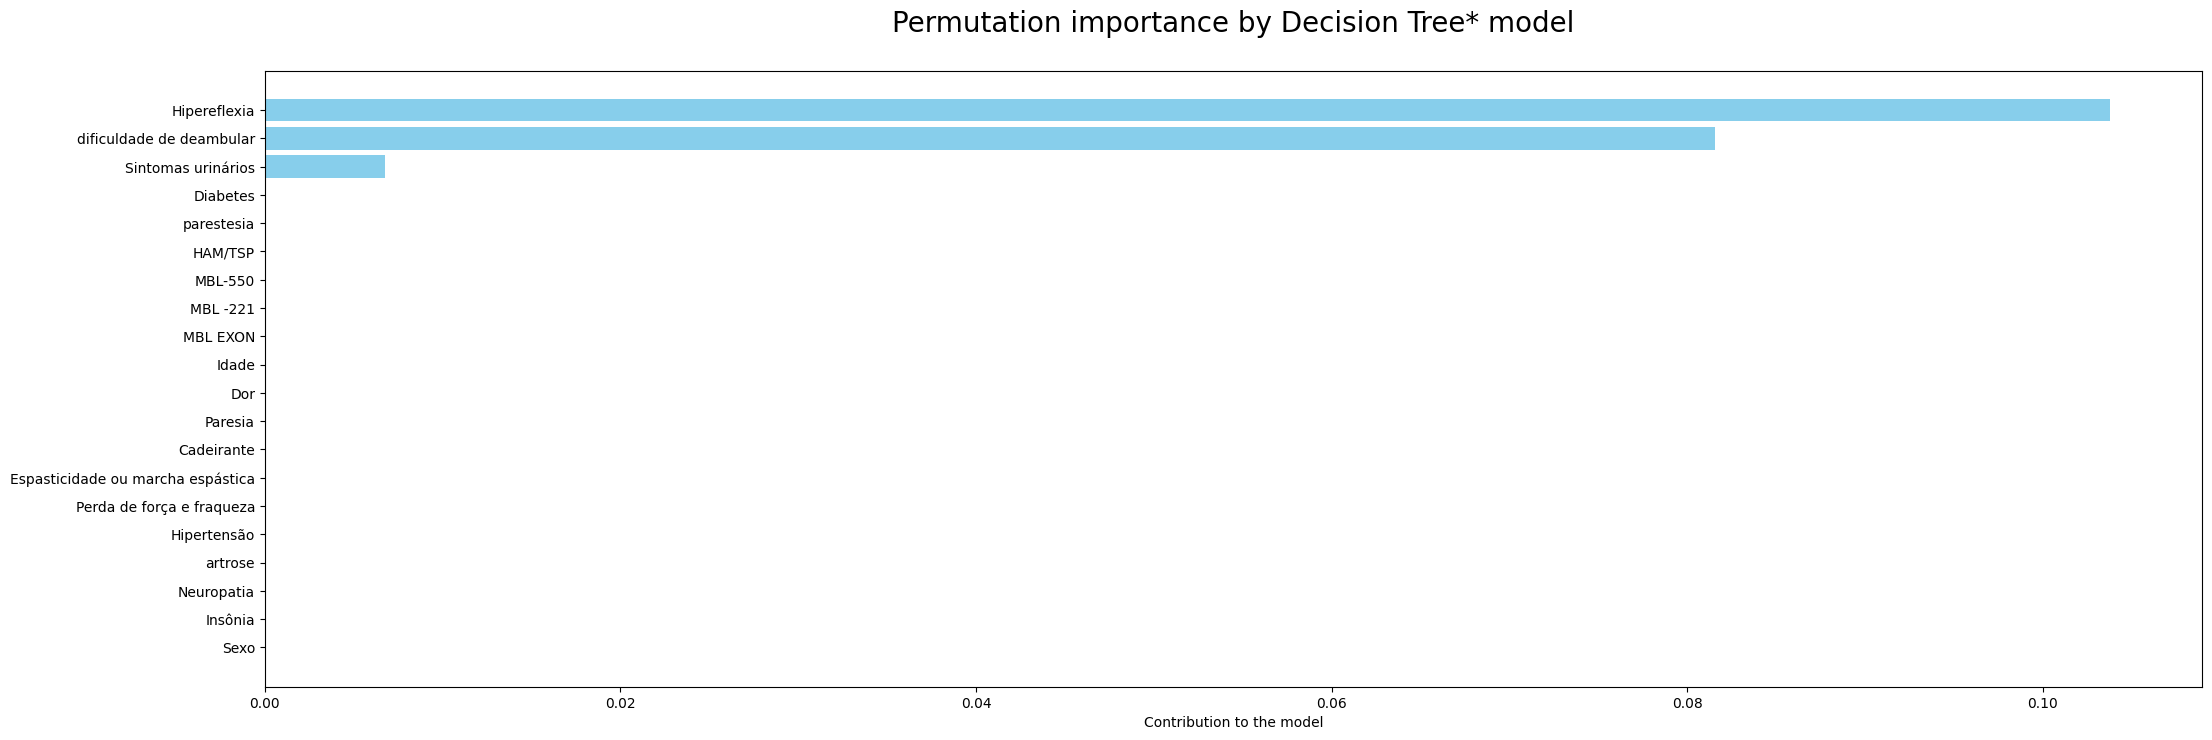

Arquivo referente ao modelo Random Forest salvo com sucesso!


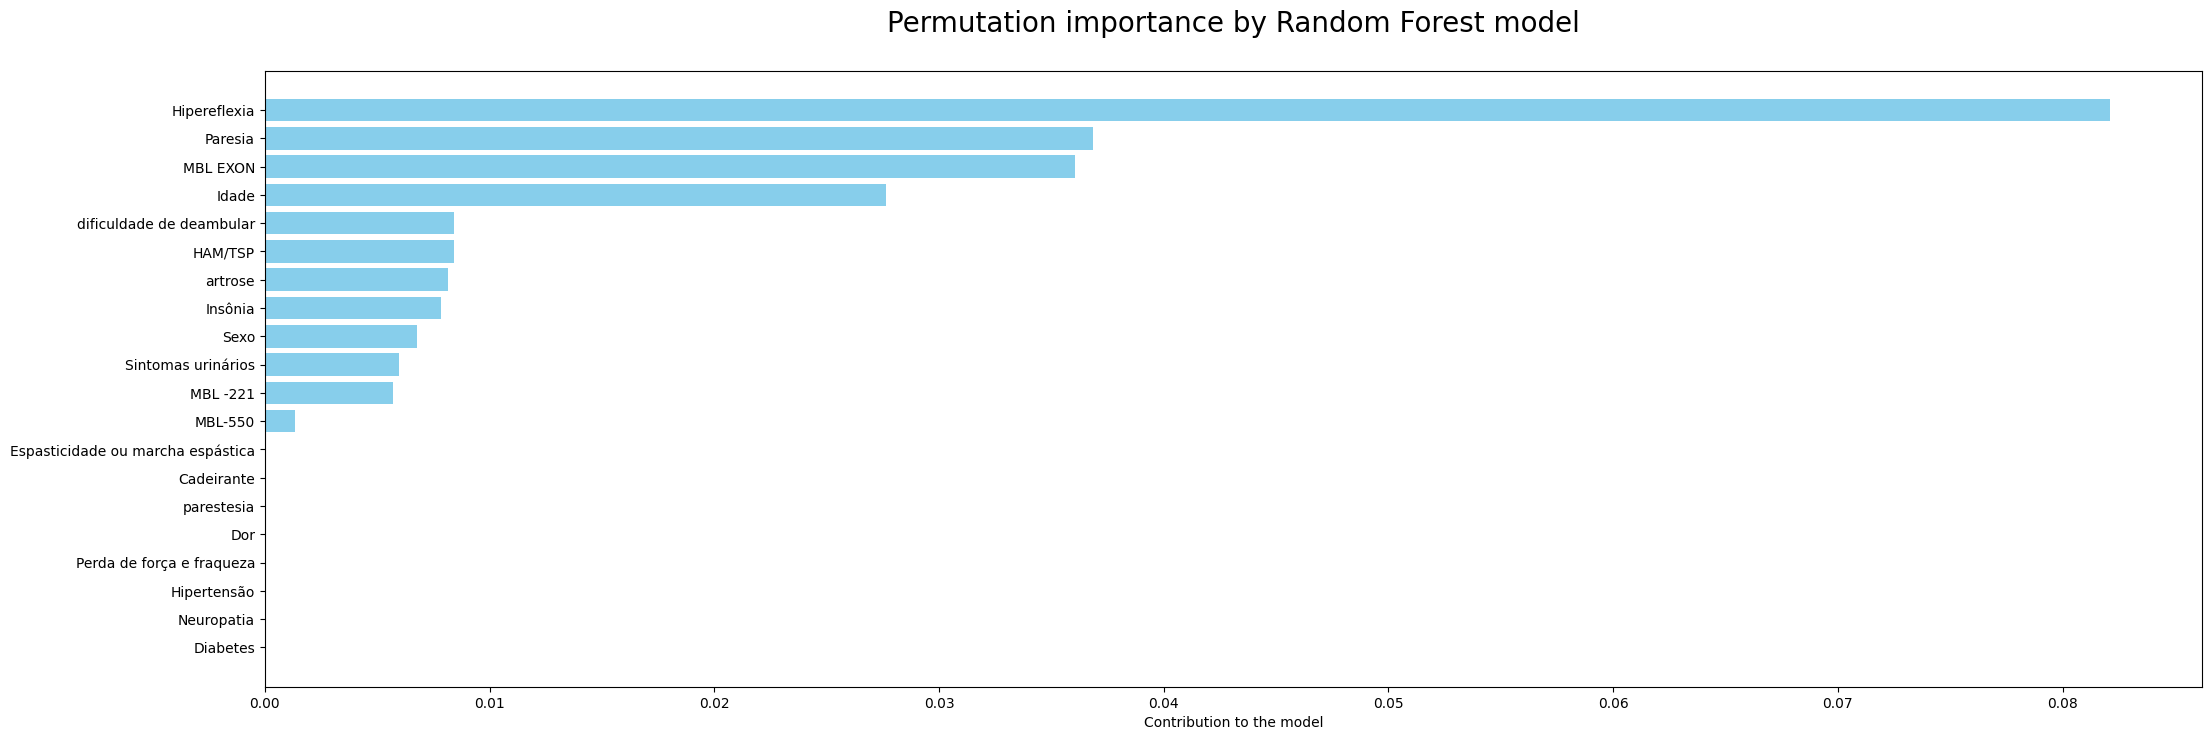

Arquivo referente ao modelo AdaBoost salvo com sucesso!


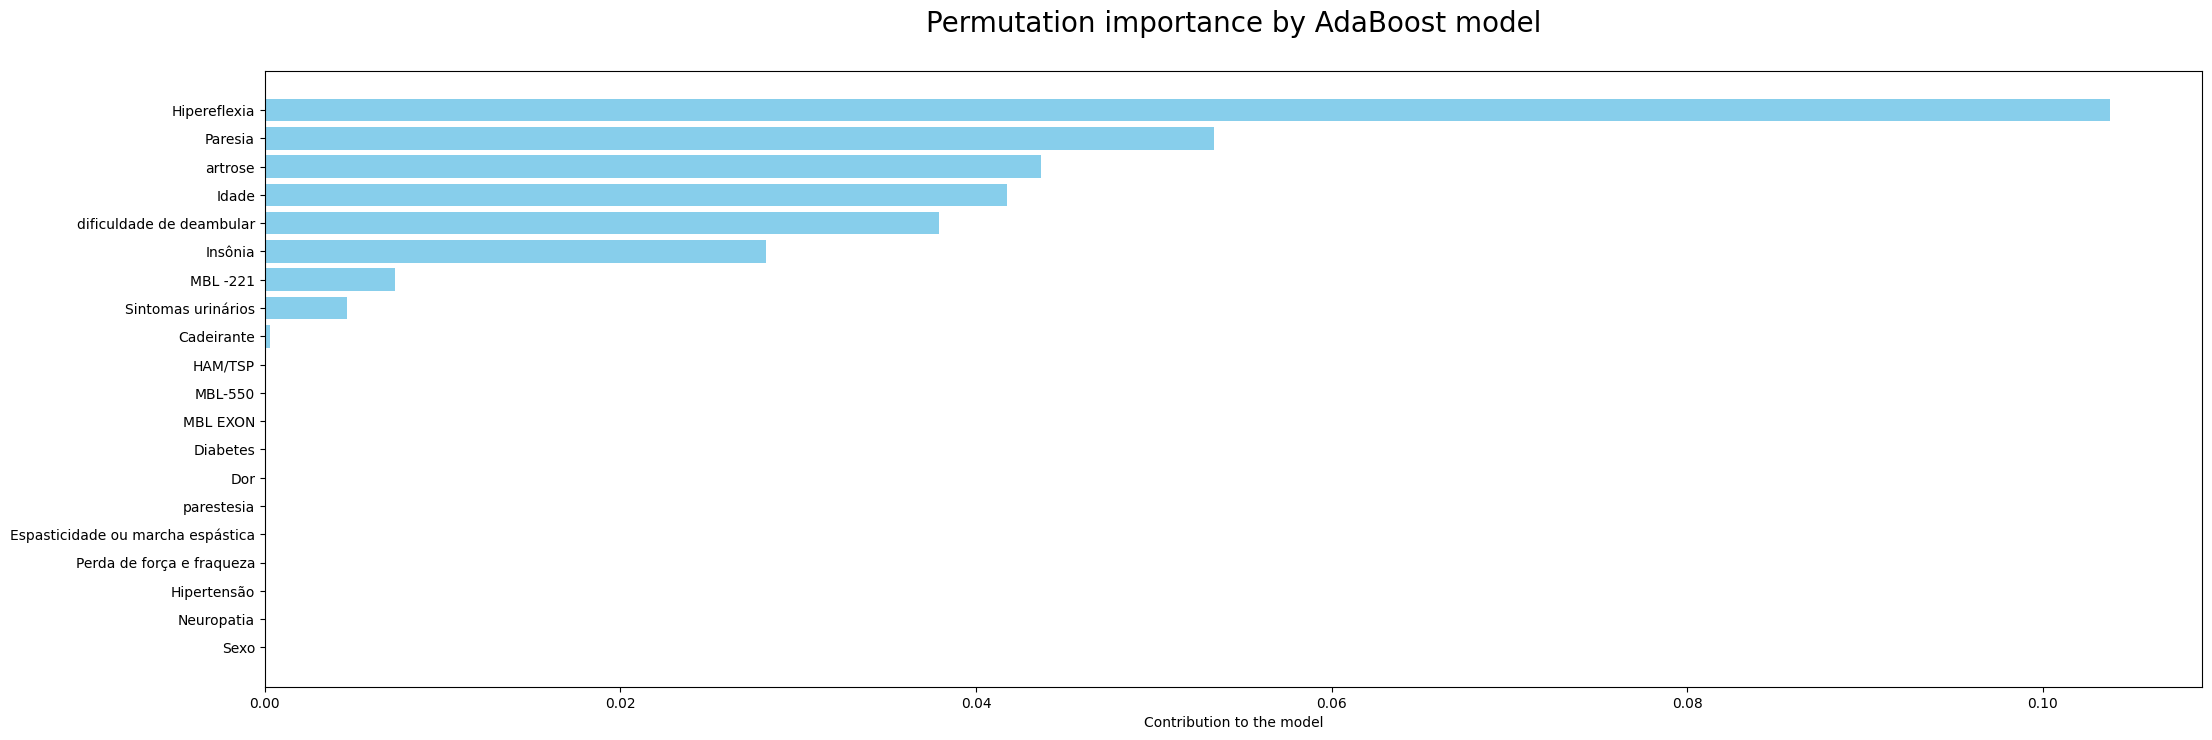

Arquivo referente ao modelo Gradient Boosting salvo com sucesso!


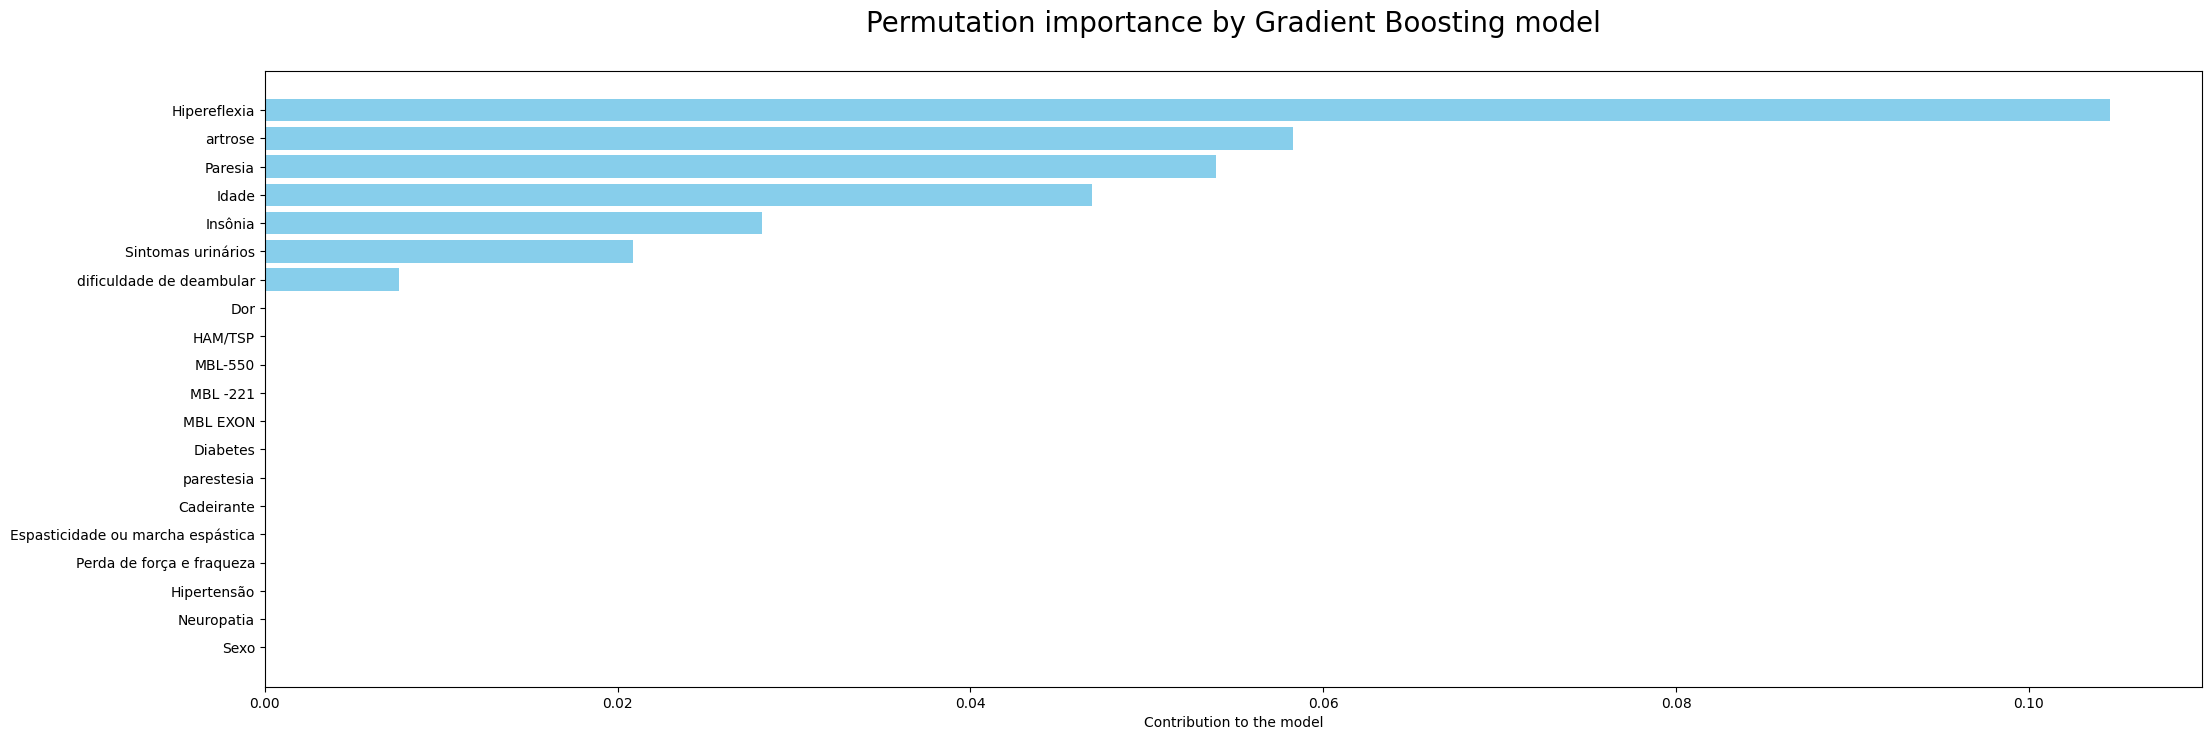

Arquivo referente ao modelo Naive Bayes salvo com sucesso!


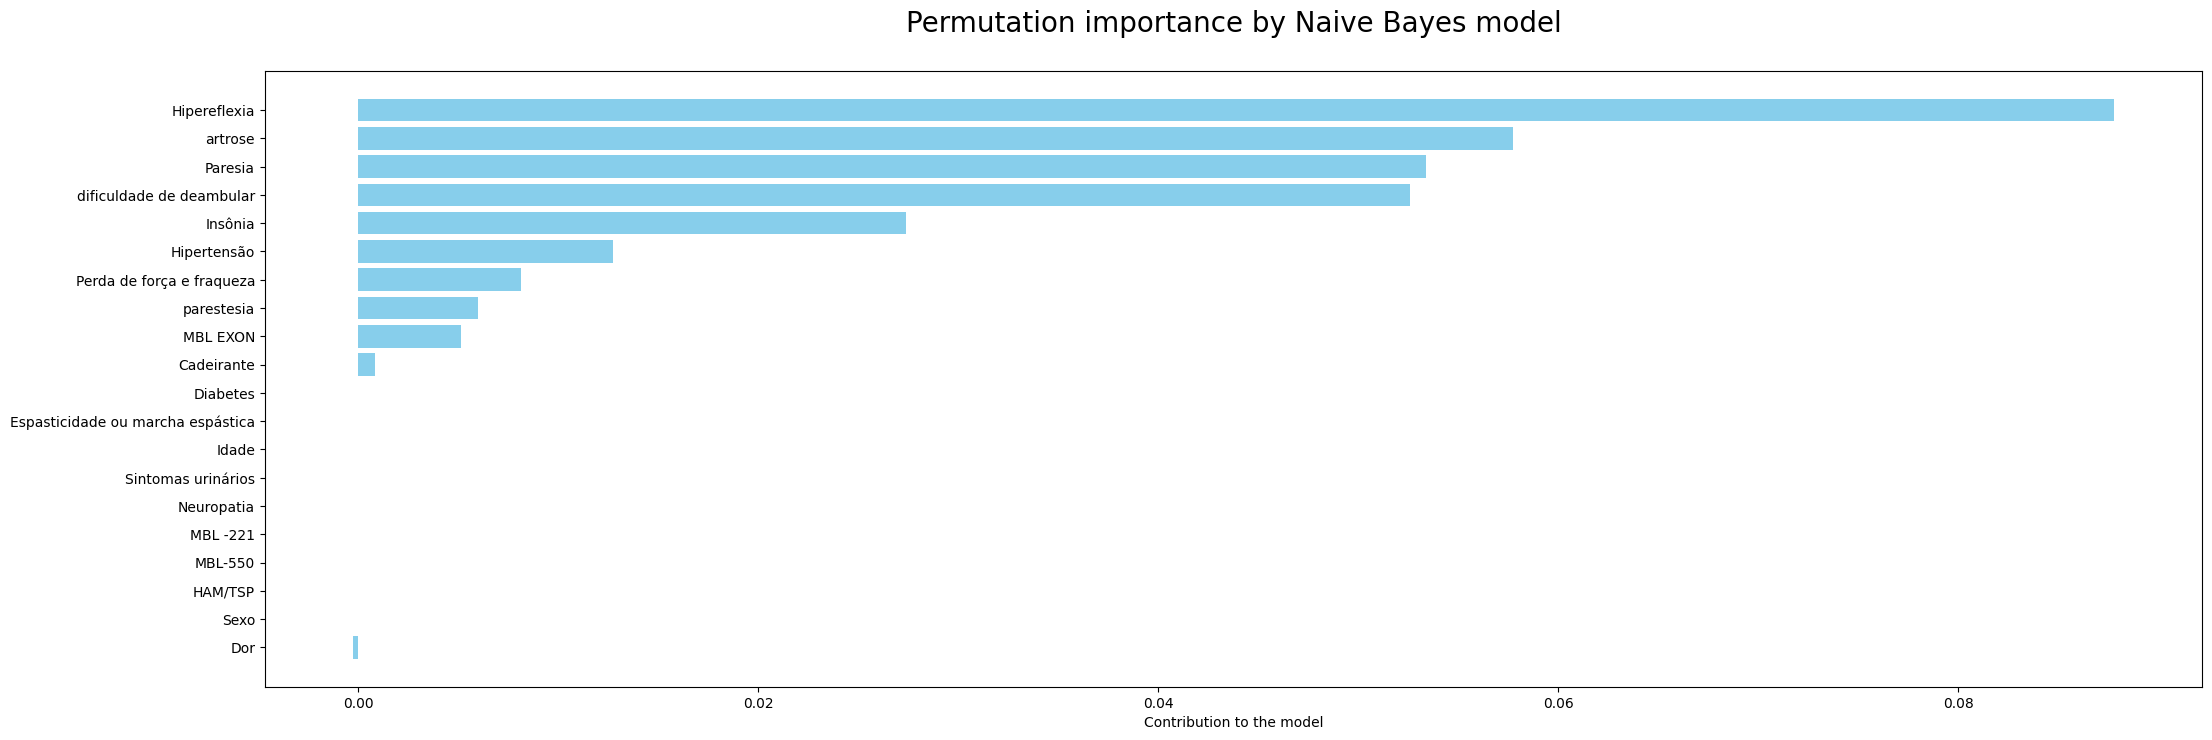

Arquivo referente ao modelo Linear DA salvo com sucesso!


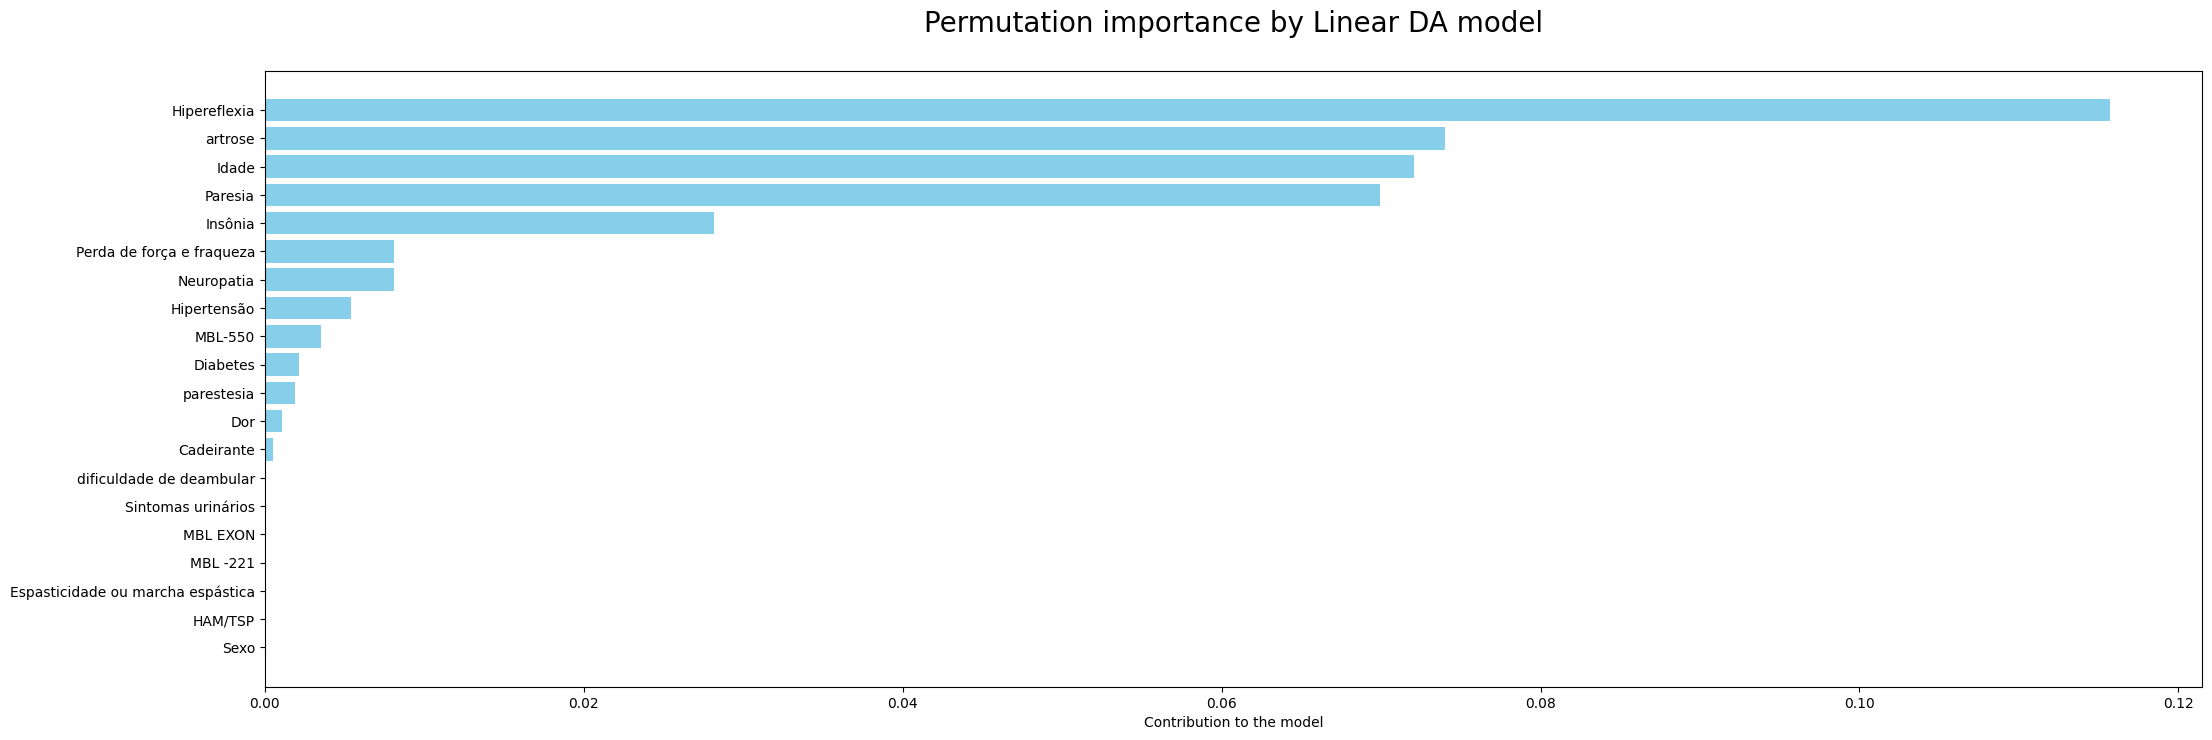

In [ ]:
# Create the column_names matrix
column_names = df.columns
n_splits = 5
data_table = pd.DataFrame()
seed = 42

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for item, nome in zip(classifiers, names):
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        item.fit(x_train, y_train)

    # Calculate the importance of permutation using the "item" model
    features_contribution = permutation_importance(item, x_train, y_train, n_repeats=30, random_state=0)
    sorted_index = np.argsort(features_contribution.importances_mean)

    # Check that the number of columns_names is equal to the consistent sorted_index
    num_features = min(len(column_names), len(sorted_index))

    # Printing permutation importance values and sending them to the drive
    with open(f'Permutation_importance.txt {nome}', 'w') as arquivo:
        print(f'Classifier: {nome}', file=arquivo)
        for i in range(num_features):
            coluna = df.columns[sorted_index[i]]
            print(f"Feature: {coluna} - Importance: {features_contribution.importances_mean[sorted_index[i]]:.3f} +/- {features_contribution.importances_std[sorted_index[i]]:.3f}", file=arquivo)
            print(file=arquivo)

    # Define the y-axis labels as the names of the columns sorted by importance
    caminho_arquivo = f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Permutation_results_txt/Permutation_importance_{nome}.txt'
    caminho_origem = f'Permutation_importance.txt {nome}'
    if os.path.exists(caminho_origem):
        # Move the file to the destination
        shutil.move(caminho_origem, caminho_arquivo)
        print(f"Arquivo referente ao modelo {nome} salvo com sucesso!")
    else:
        print(f"Arquivo referente ao modelo {nome} não foi encontrado")

    # Plotting the horizontal bar chart
    plt.figure(figsize=(25, 8))
    plt.barh(range(x_train.shape[1]), features_contribution.importances_mean[sorted_index], color='skyblue')
    plt.yticks(range(x_train.shape[1]), [column_names[i] for i in sorted_index], fontsize=10)
    plt.xlabel('Contribution to the model')
    plt.title(f'Permutation importance by {nome} model', fontsize=20, y=1.05)

    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Qualificação/Permutation importance/Permutation importance {nome}.jpeg')
    plt.show()


# **Permutation importance of the best and worst variables**
- Future implementations:
https://sharkcoder.com/data-visualization/mpl-barh-chart

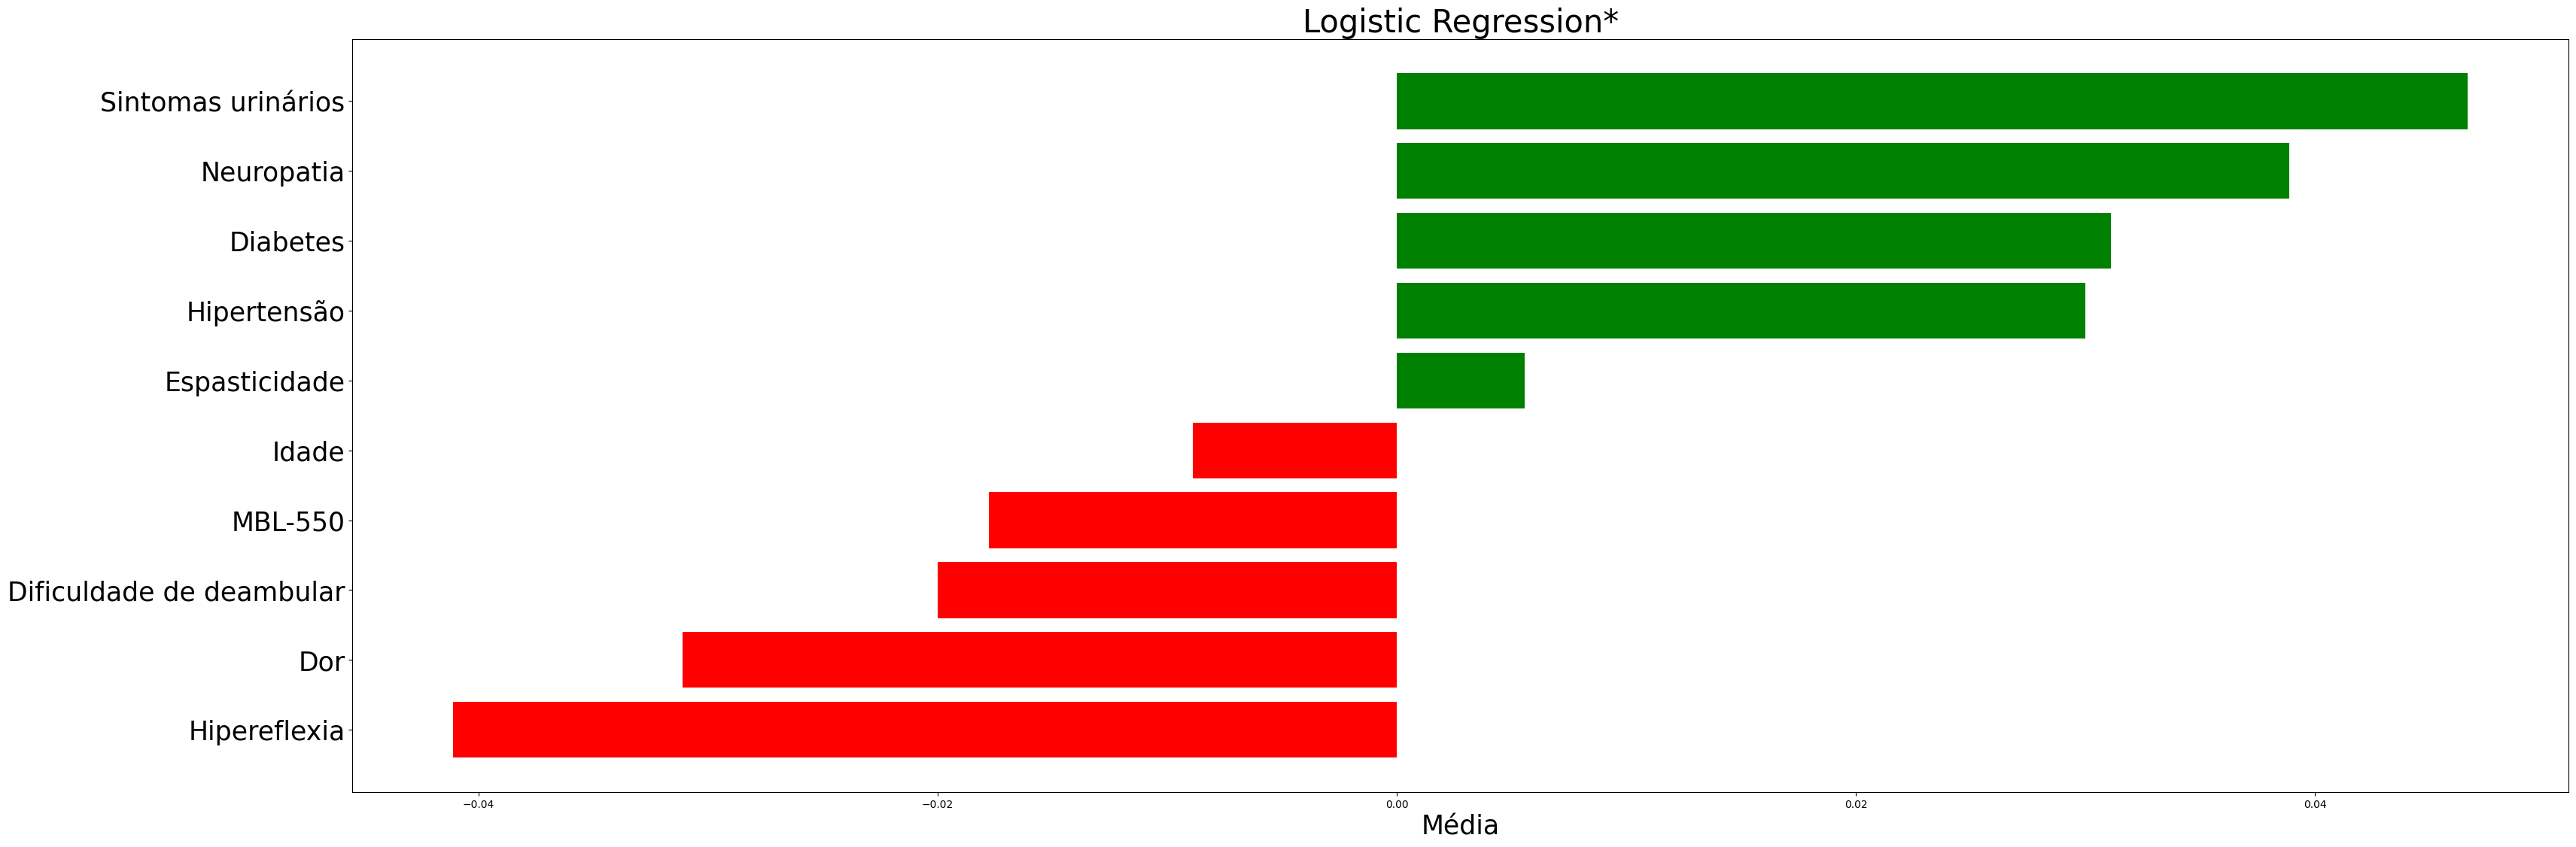

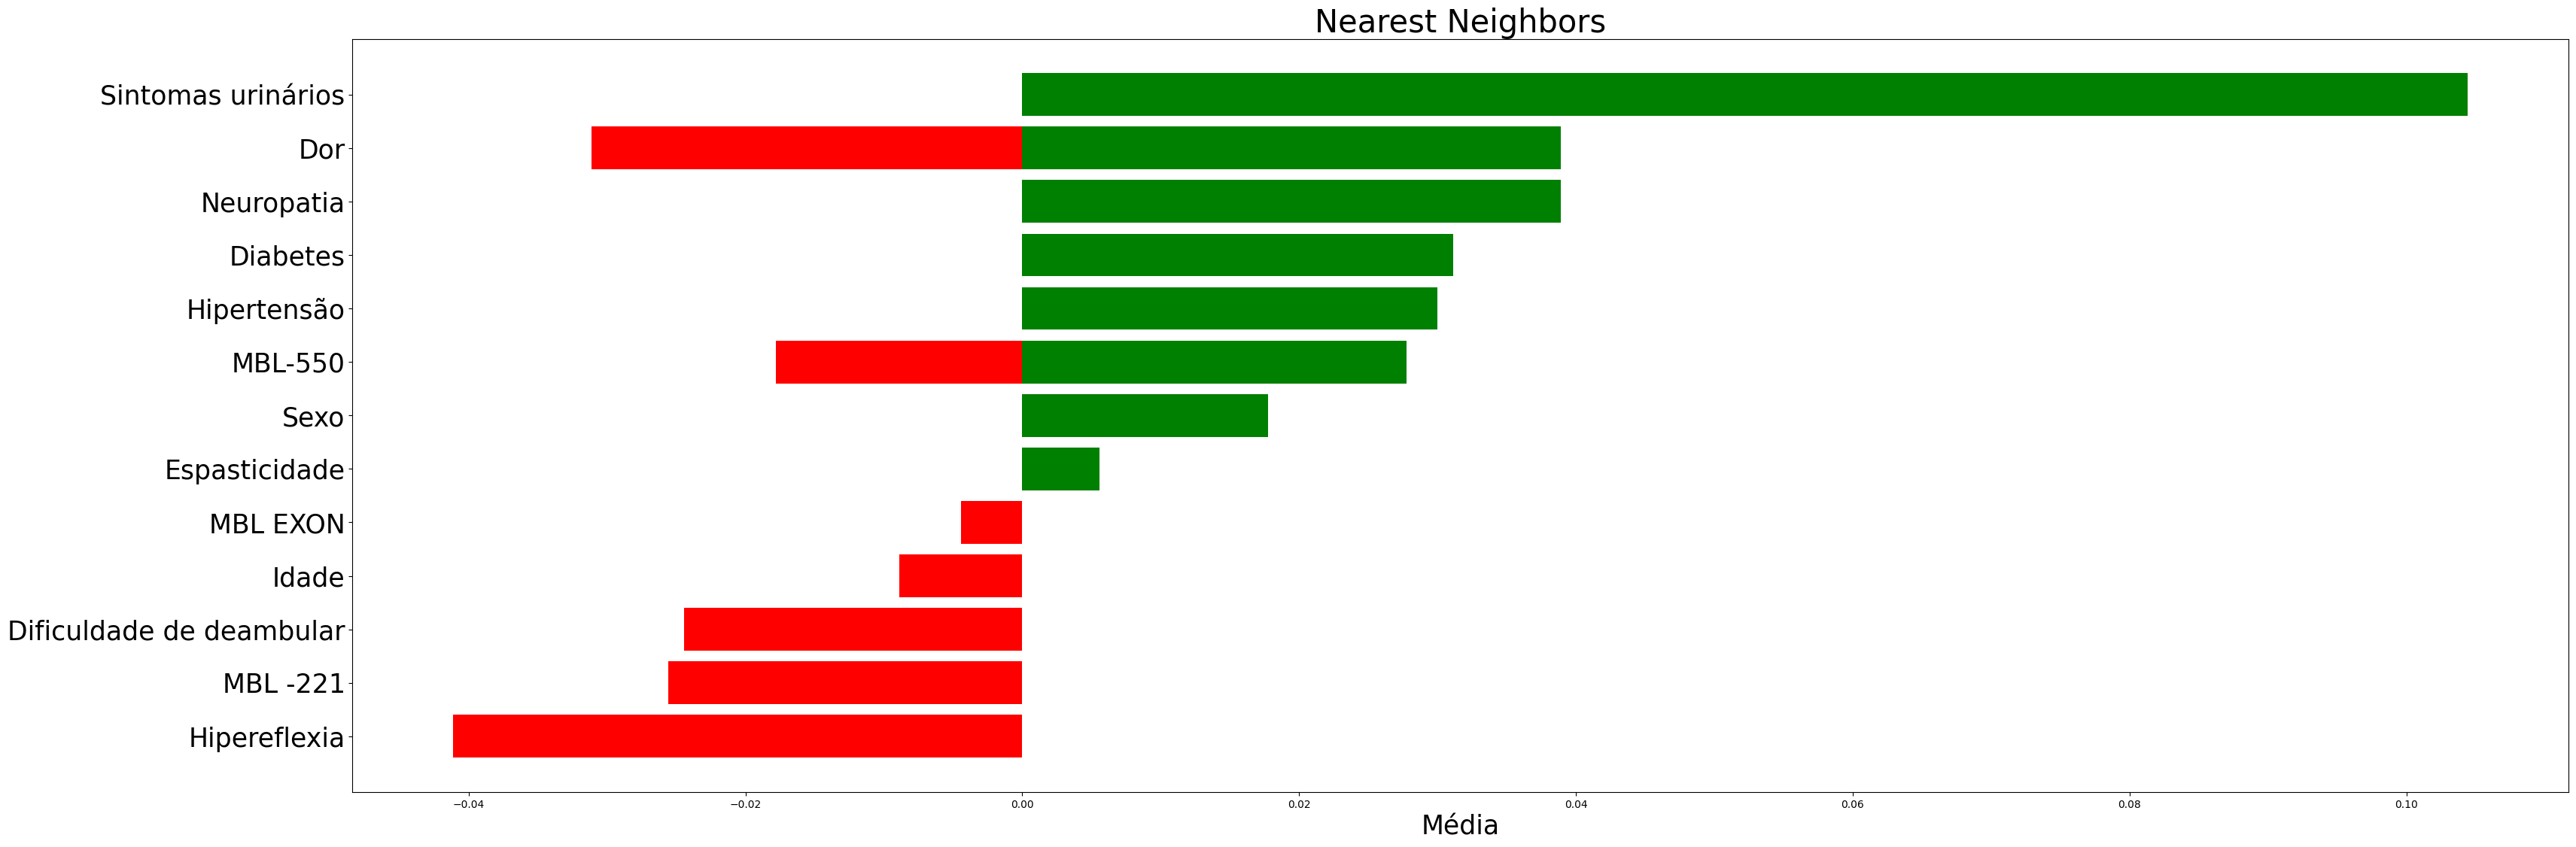

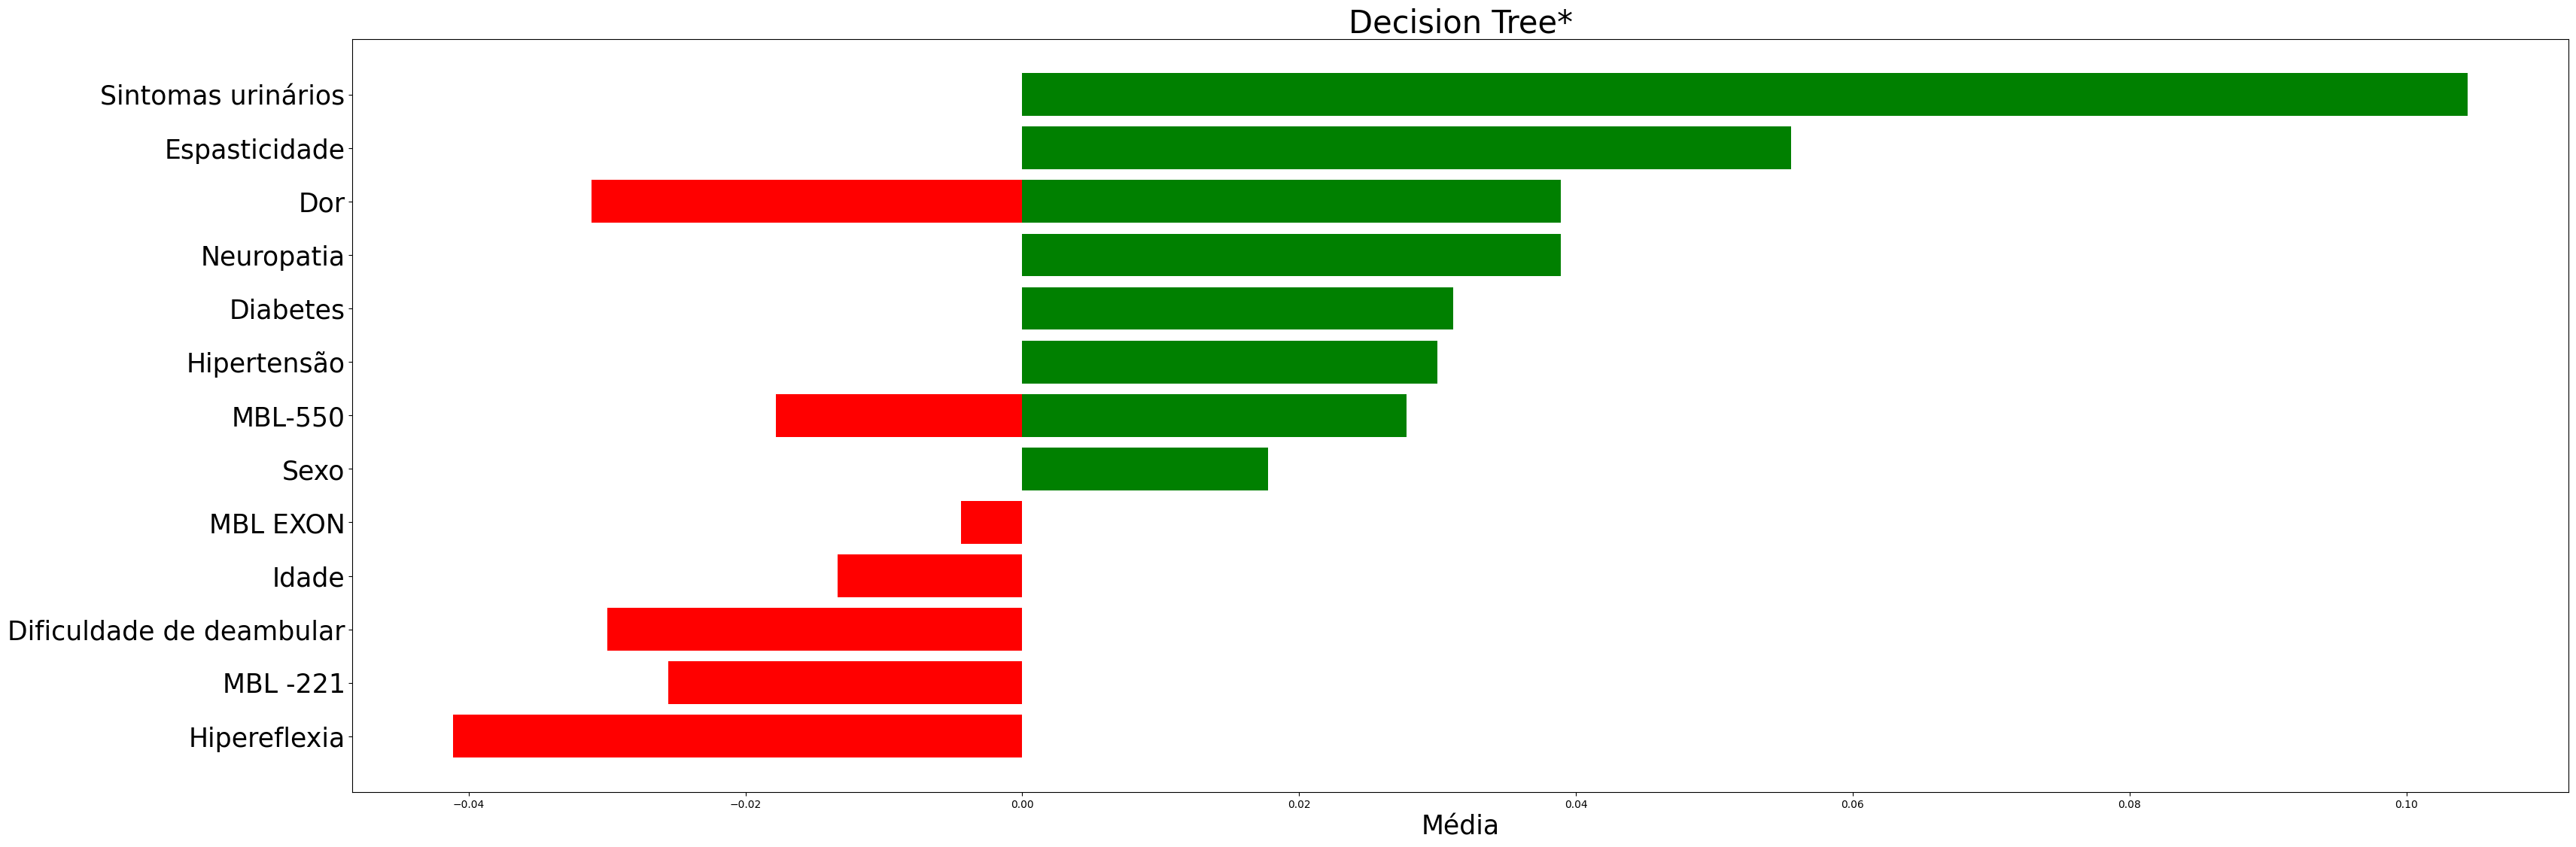

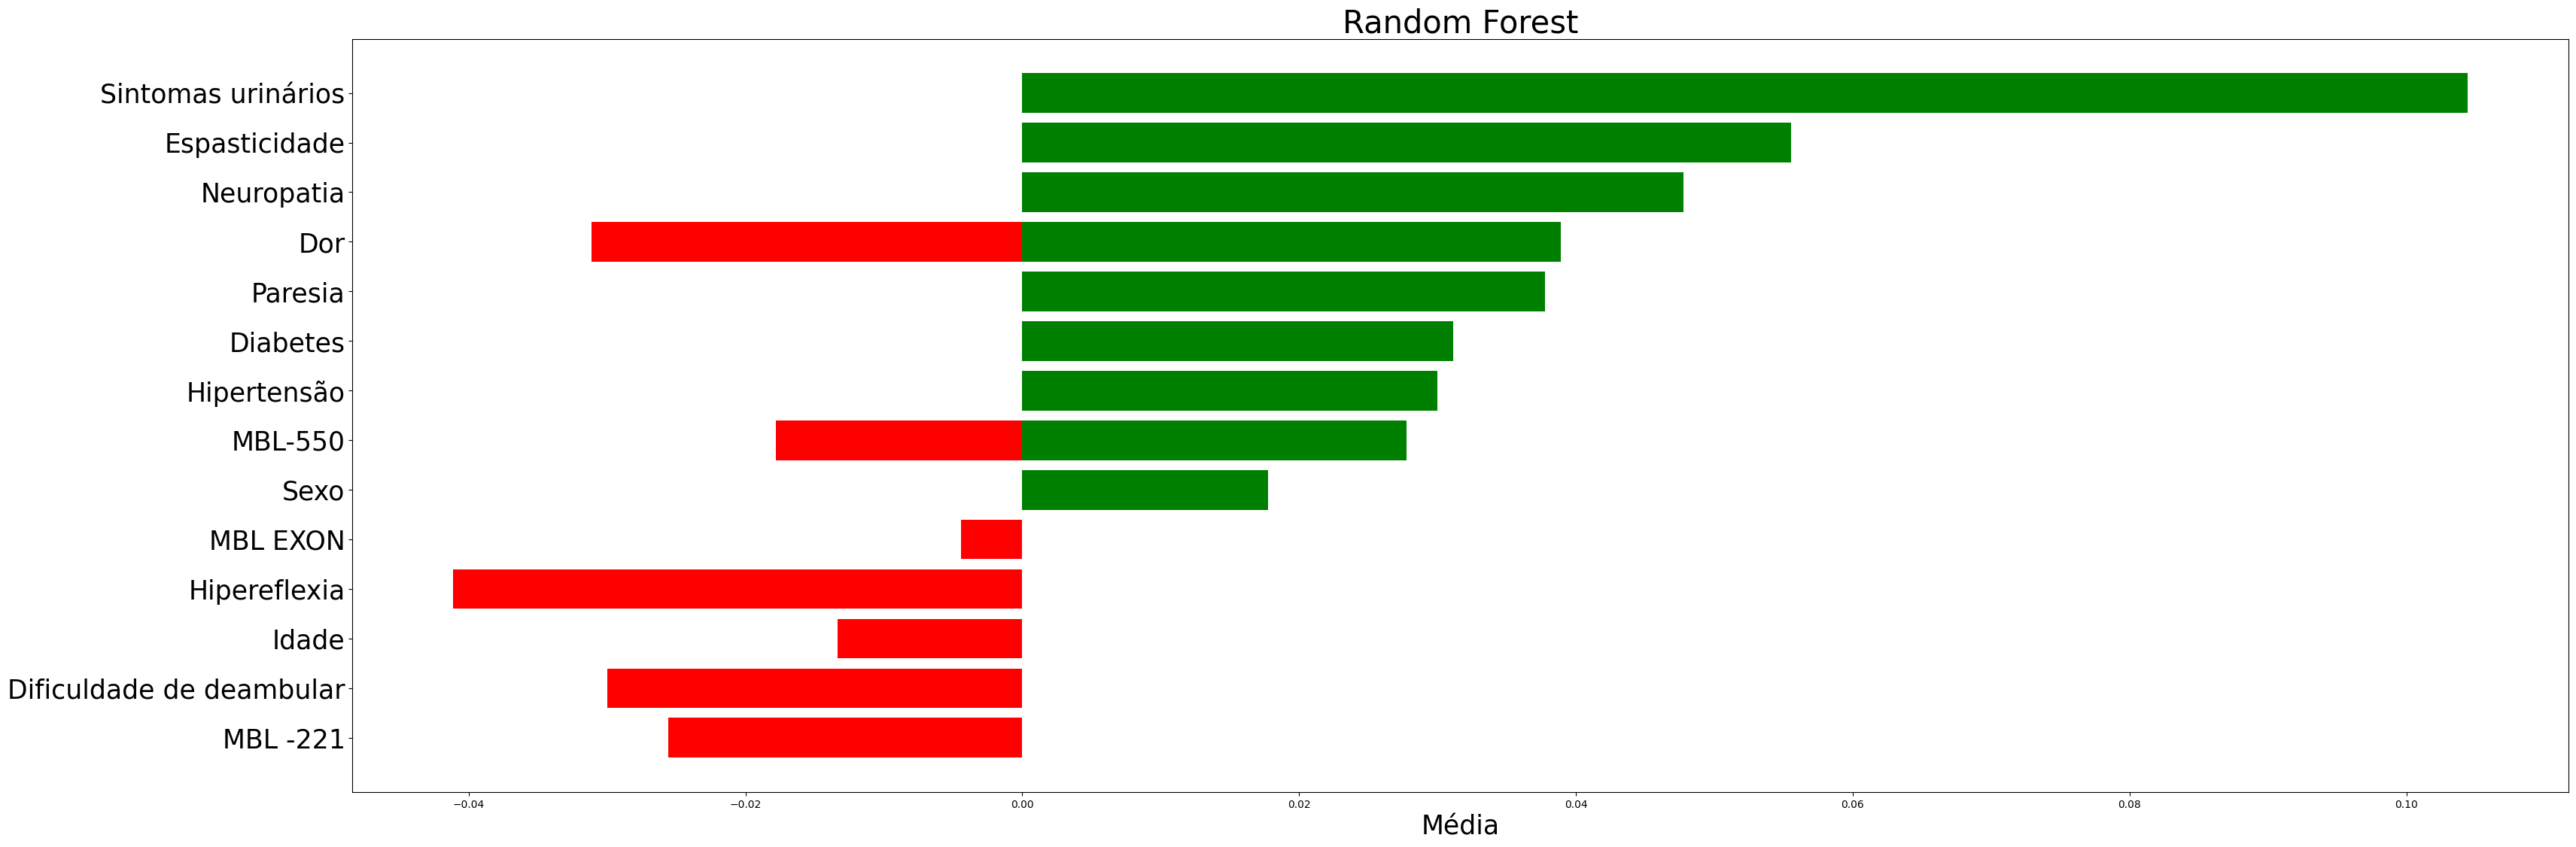

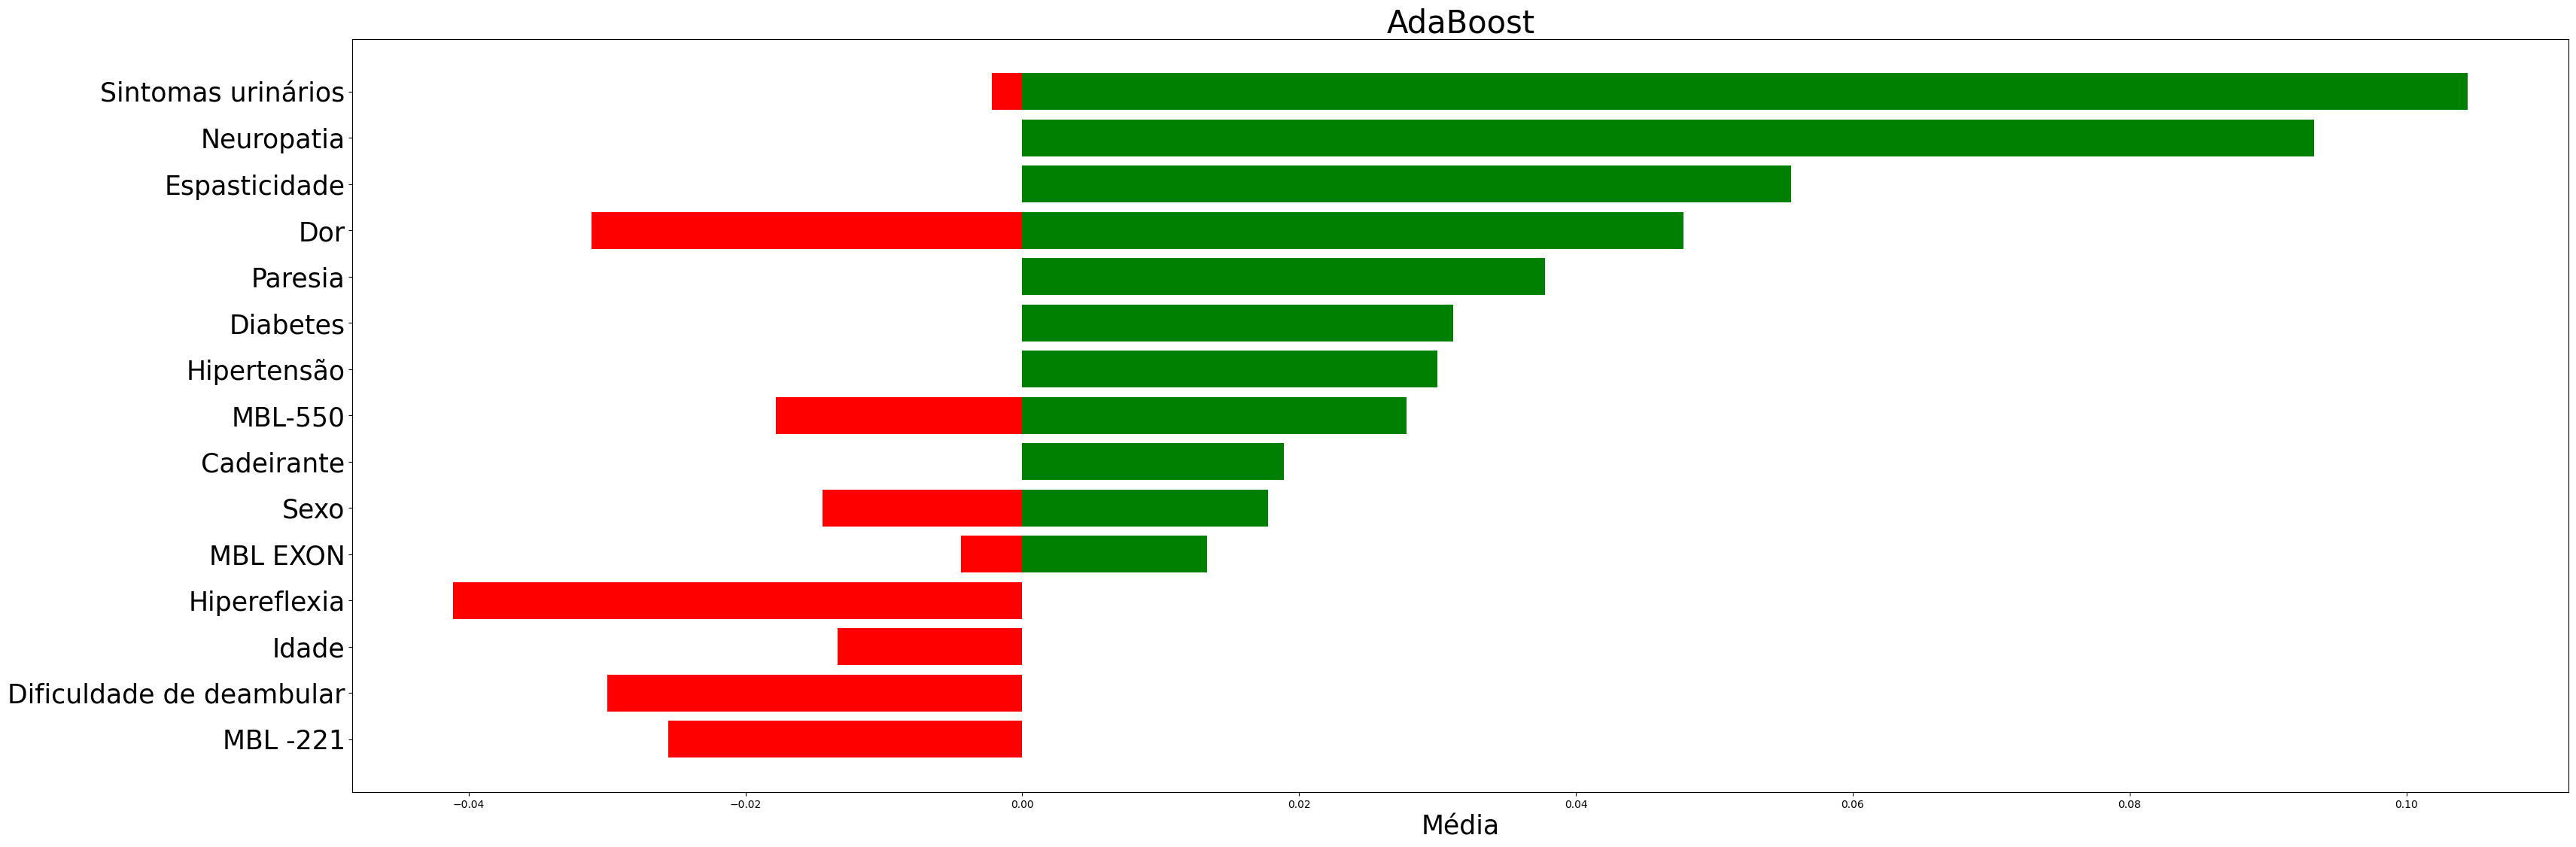

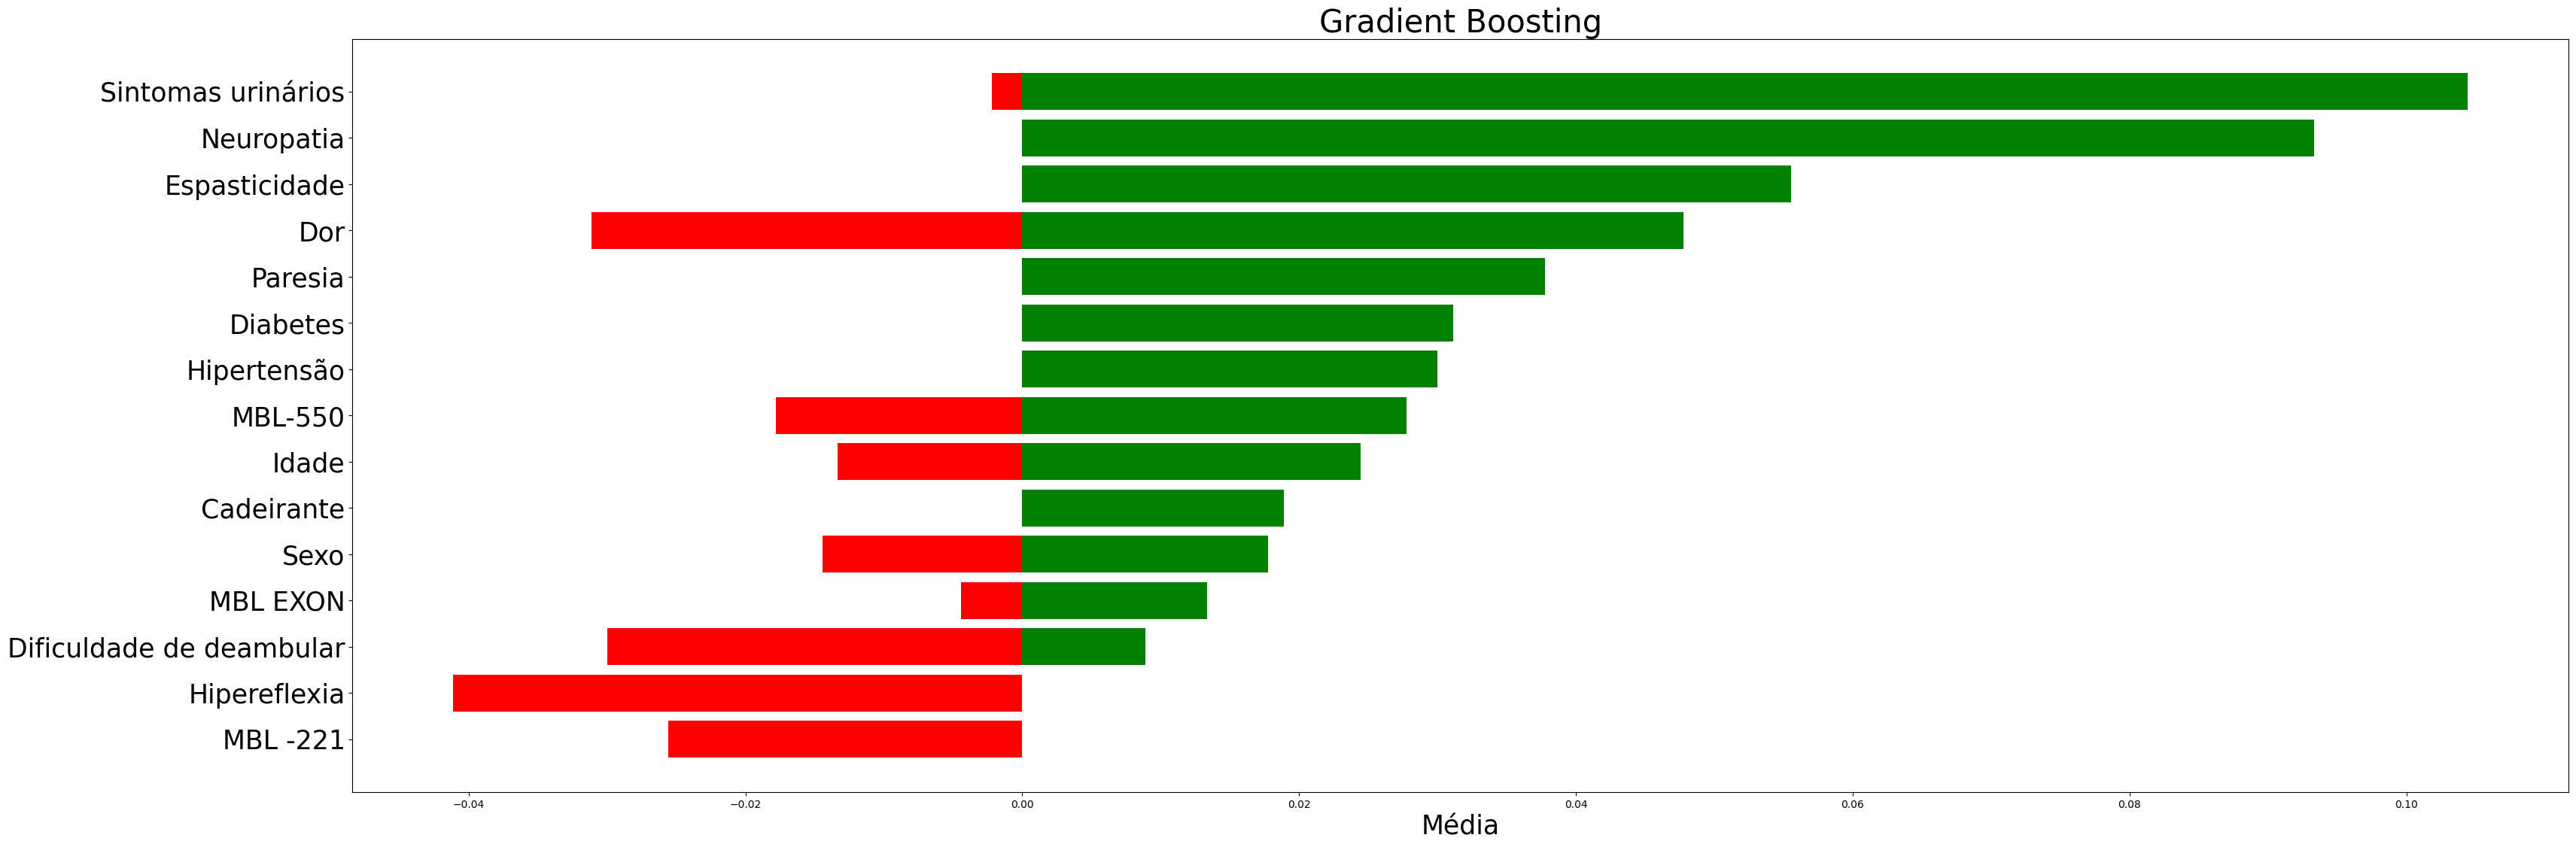

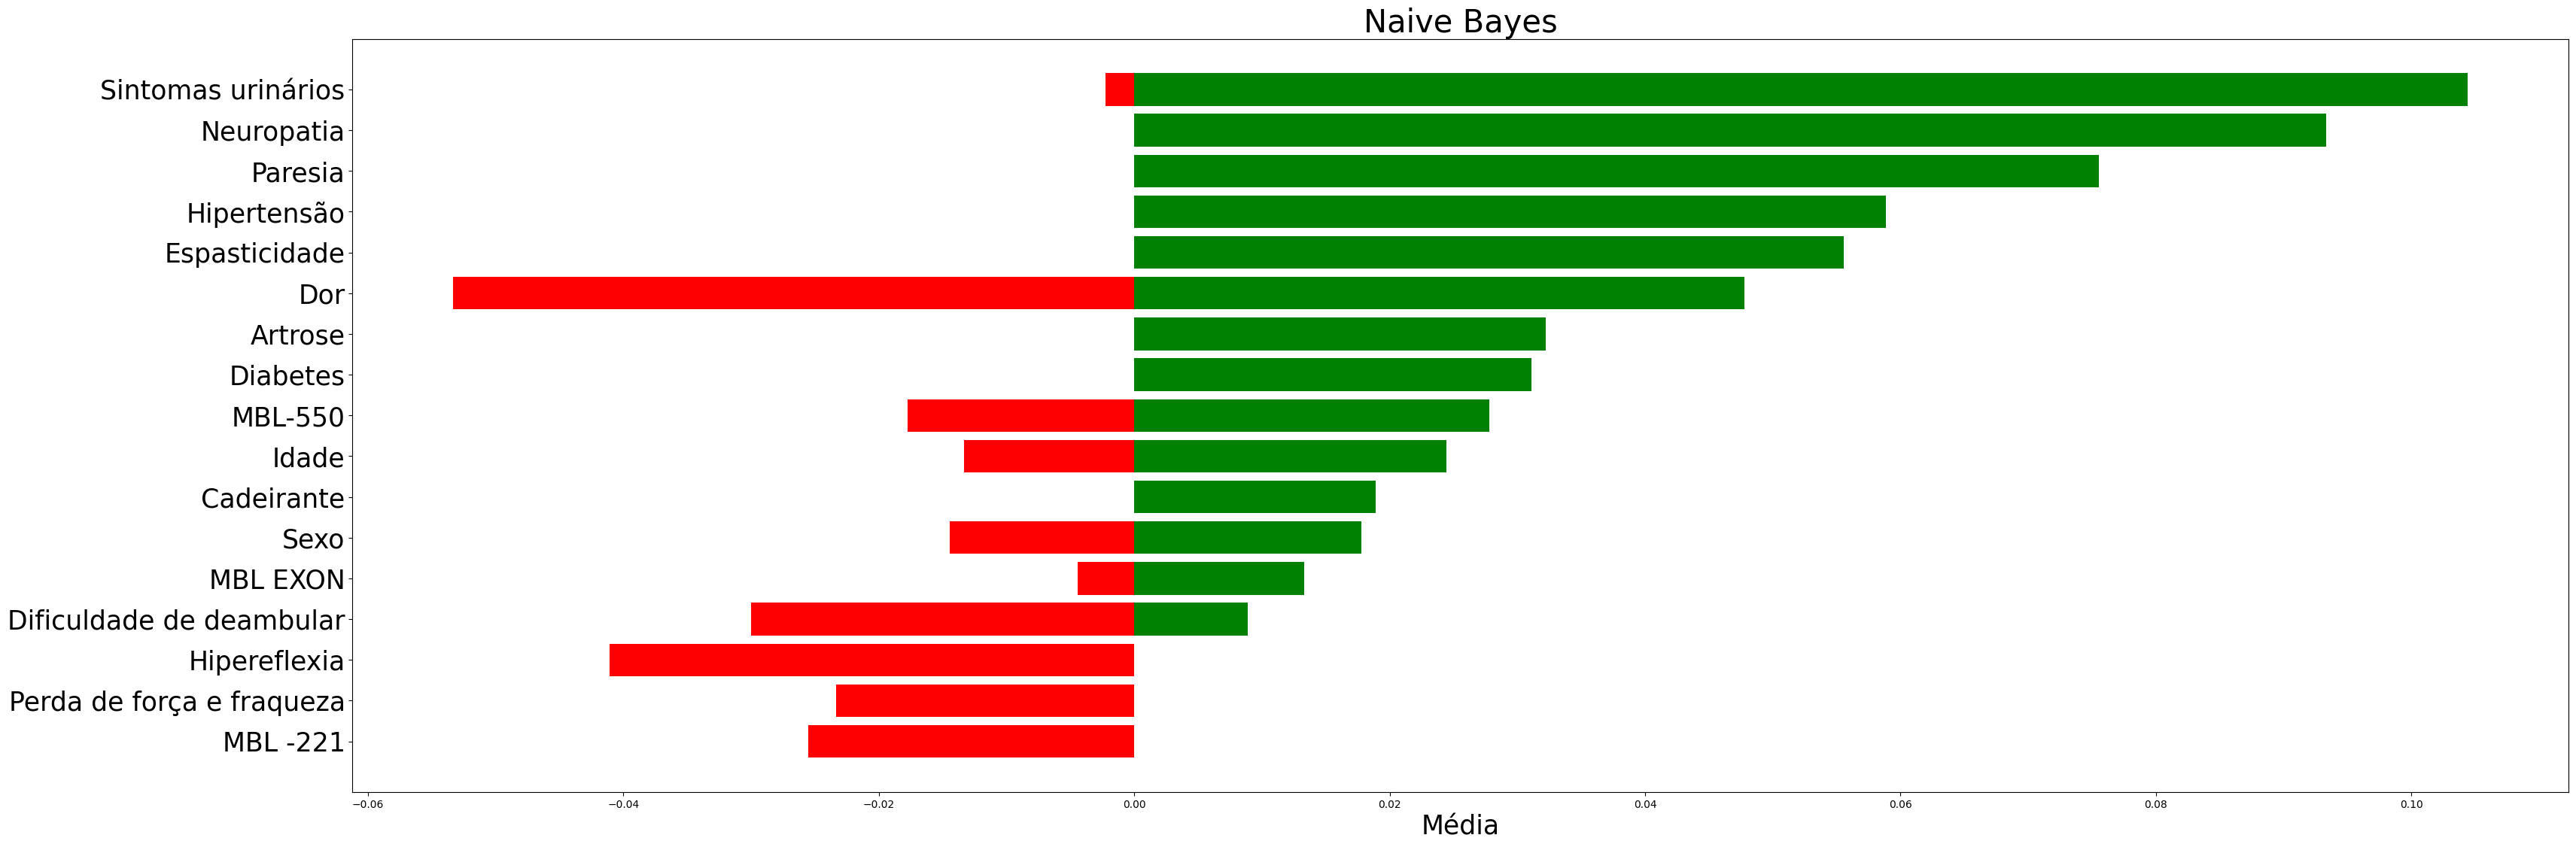

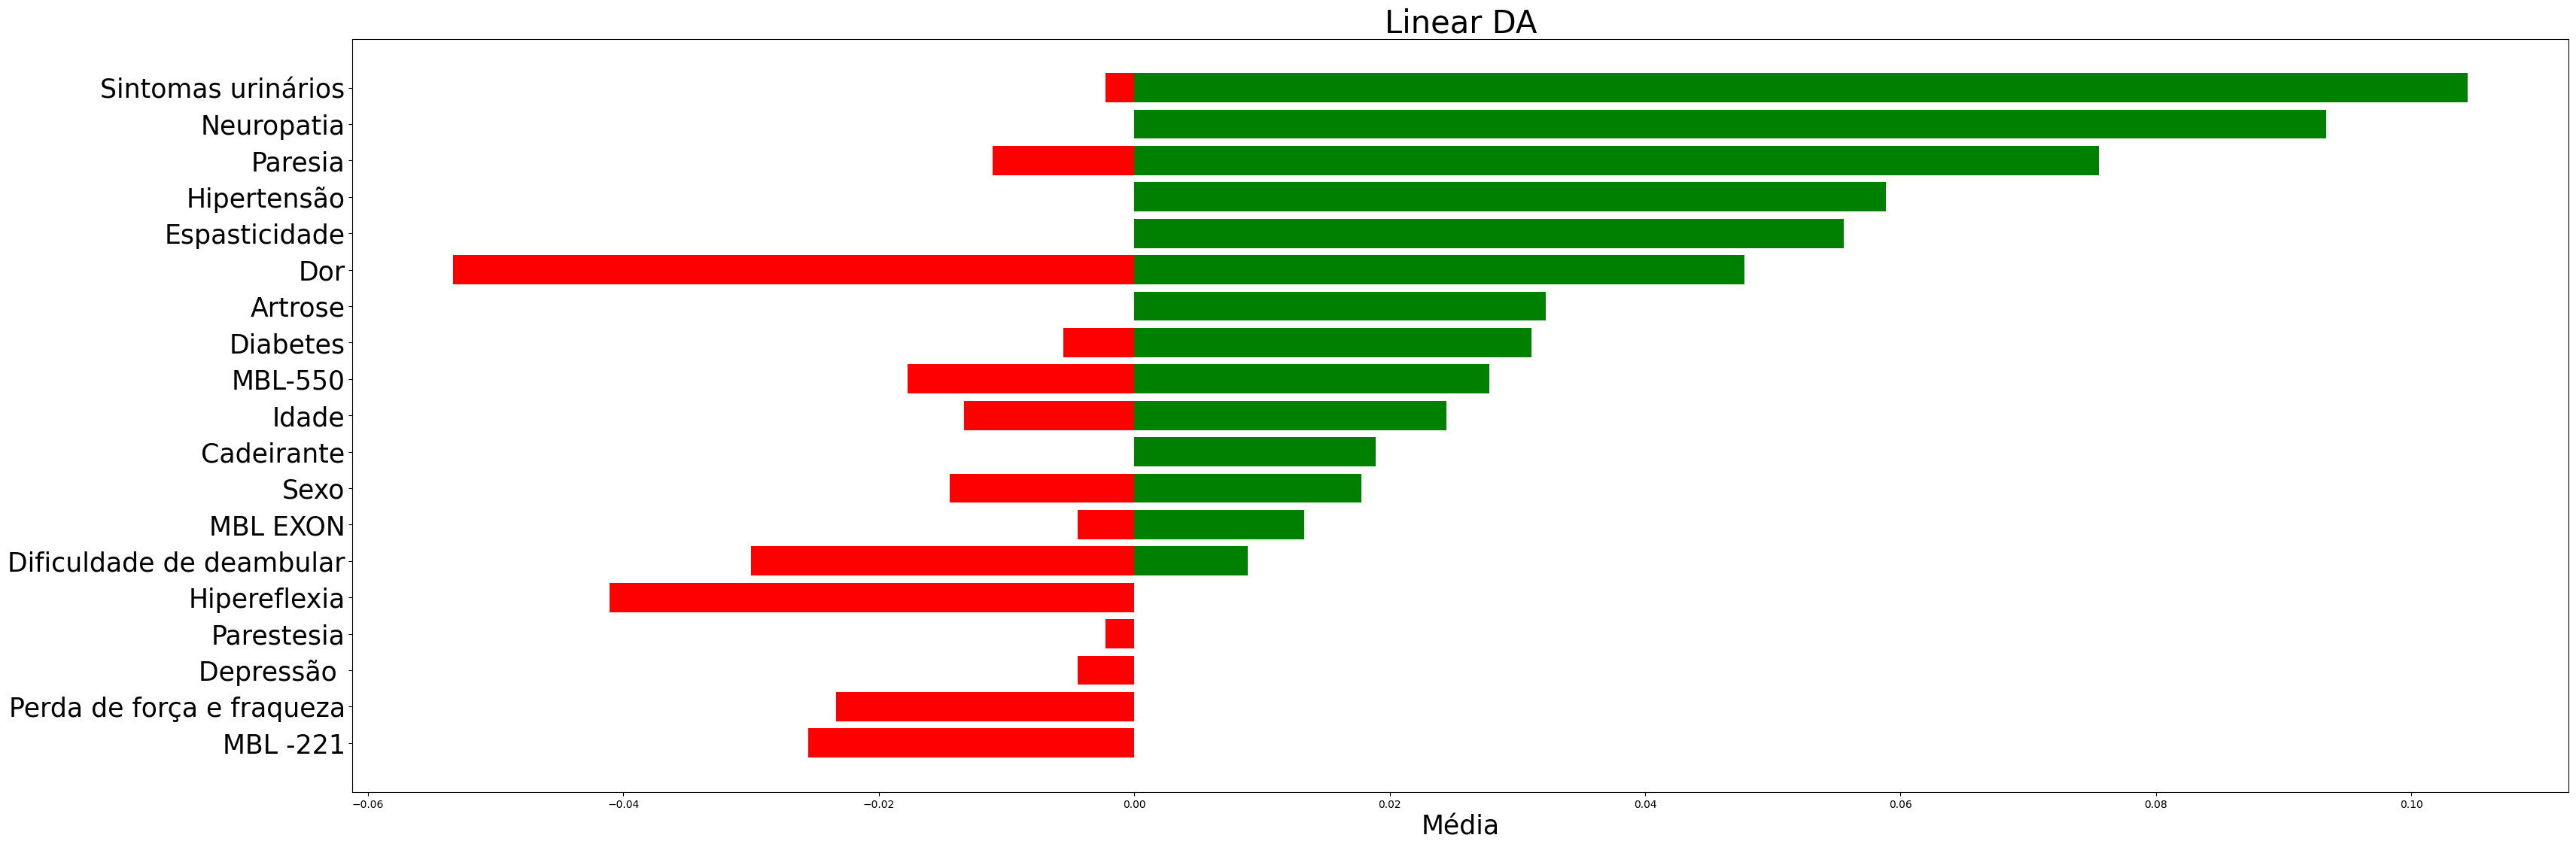

In [ ]:
# Create the column_names matrix
column_names = x.columns


# Initialize Excel results DataFrame
excel_results = pd.DataFrame(columns=["Modelo", "Média", "Variável"])

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

for item, nome in zip(classifiers, names):
    lst = []
    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Ajustar o classificador aos dados de treinamento
        item.fit(x_train, y_train)

    # Calculate the importance of permutation using the "item" model
    features_contribution = permutation_importance(item, x_test, y_test, n_repeats=30, random_state=42)
    sorted_index = np.argsort(features_contribution.importances_mean)

    # Check that the number of columns_names is equal to the consistent sorted_index
    num_features = min(len(column_names), len(sorted_index))

    # Append the results to Excel results DataFrame
    for i in range(num_features):
        lst.append({"Modelo": nome, "Média": features_contribution.importances_mean[sorted_index[i]], "Variável": column_names[sorted_index[i]]})

     # Create DataFrame for current model and append to excel_results
    model_results = pd.DataFrame(lst, columns=['Modelo', 'Média', 'Variável'])
    excel_results = pd.concat([excel_results, model_results], ignore_index=True)

    # Write the results to an Excel file
    excel_results.to_excel("importance_mean.xlsx", index=False)

#Fetch the top 10 values from the "Average" column
# Nlargest function return the ten best results ordened by column "Média"
    top_10 = excel_results.groupby('Modelo').apply(lambda x: x.nlargest(5, 'Média')).reset_index(drop=True)
    worst_10 = excel_results.groupby('Modelo').apply(lambda x: x.nsmallest(5, 'Média')).reset_index(drop=True)
    selected_data = pd.concat([top_10, worst_10], ignore_index=True)
    selected_data = selected_data[selected_data['Média'] != 0]
    selected_data = selected_data.sort_values(by='Média', ascending=False)

    #color definition
    cores = ['green' if media > 0 else 'red' for media in selected_data['Média']]

    # Generation of bar plot
    plt.figure(figsize=(38, 13))
    plt.barh(selected_data['Variável'], selected_data['Média'], color=cores)
    plt.xlabel('Média', fontsize=25)
    plt.yticks(fontsize=25)
    plt.title(nome, fontsize=30)
    plt.gca().invert_yaxis()  # Inverter o eixo y para que o maior valor apareça no topo
    plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Qualificação/Permutation importance/Best features/Top_Permutation_importance_{nome}.jpeg')
    plt.show()

    selected_data.to_excel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'+"Top_features.xlsx", engine='openpyxl')

# **Feature importance**

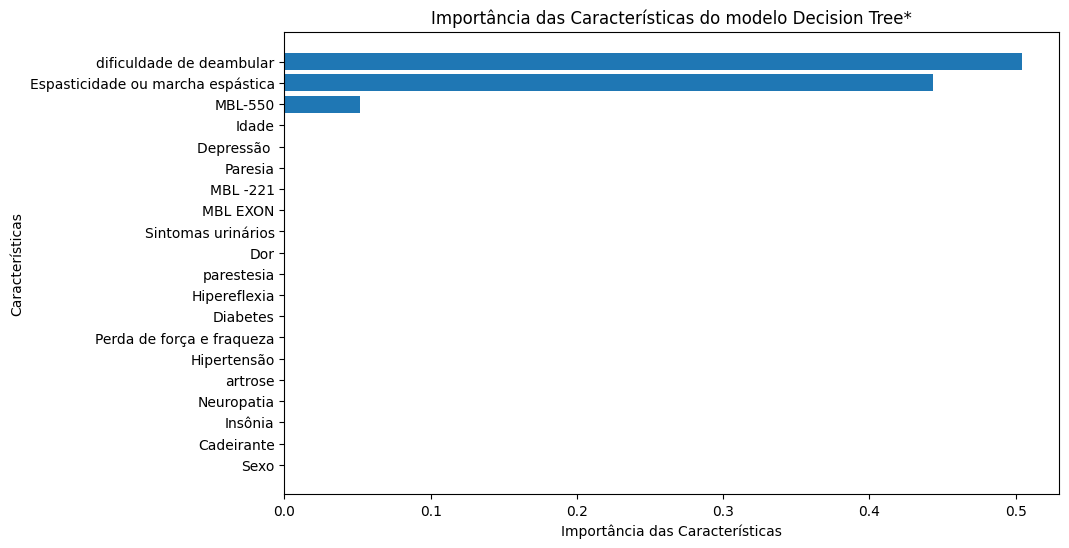

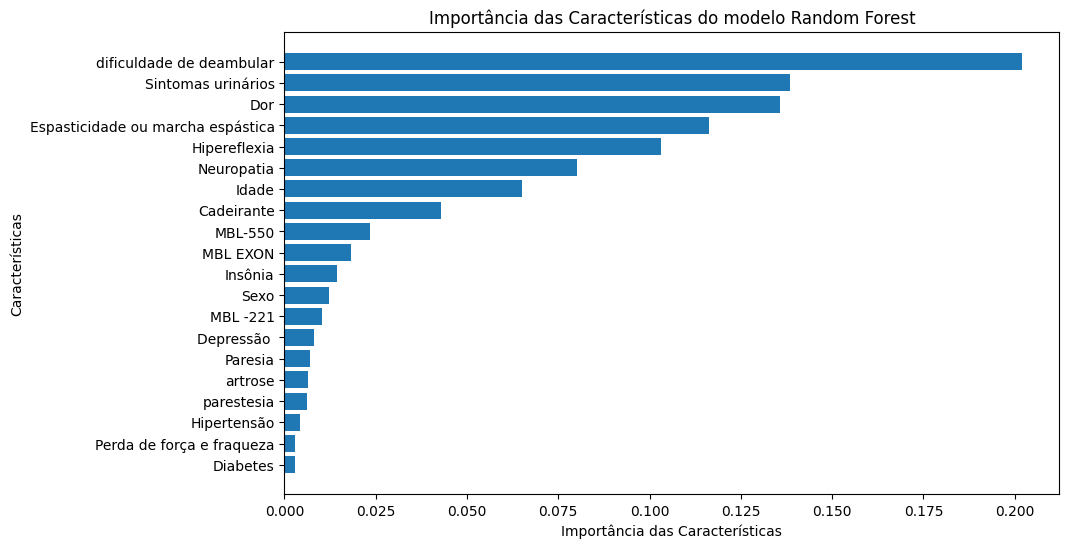

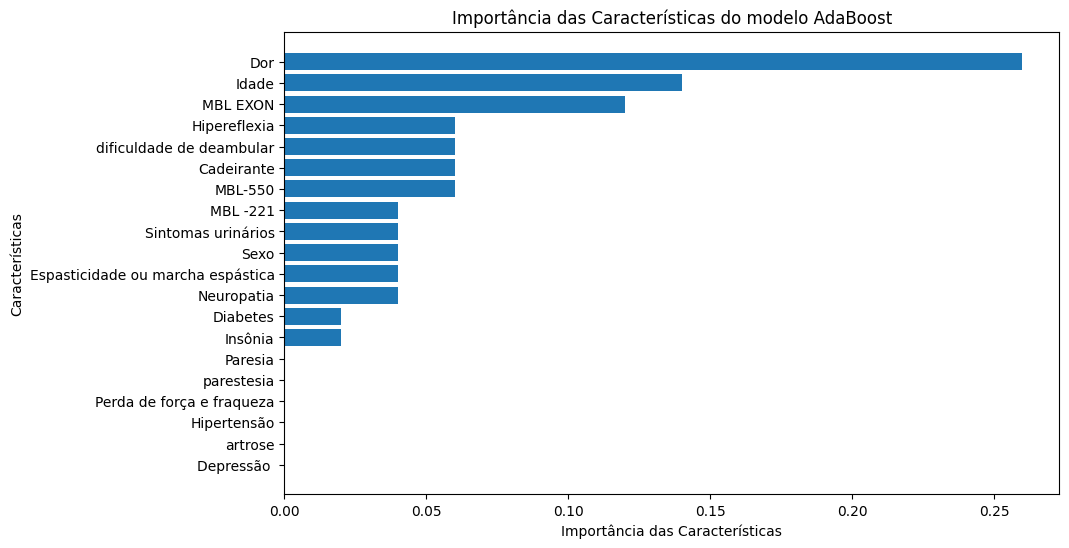

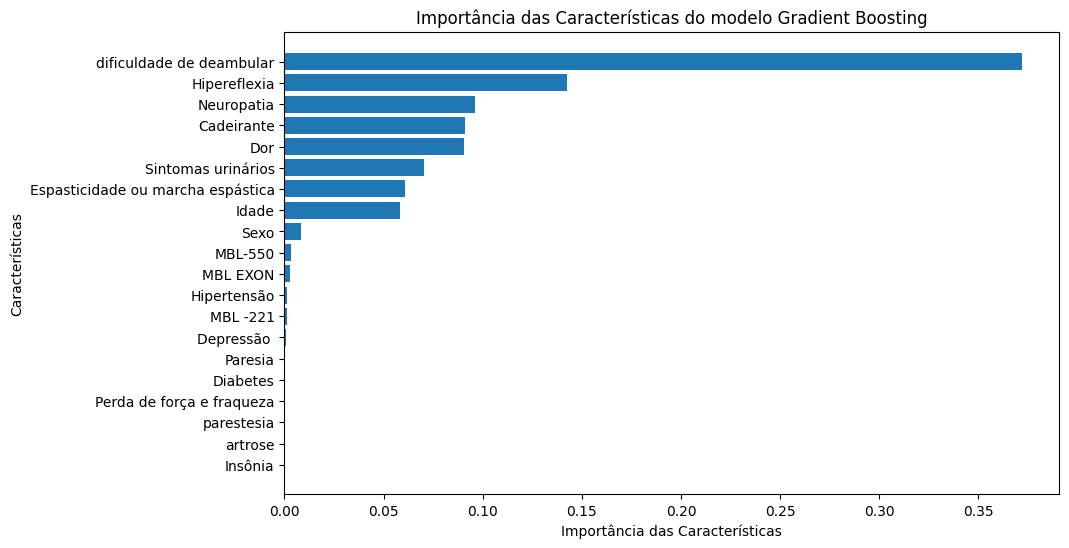

In [ ]:
# Training the classifiers
for item, nome in zip(classifiers, names):
    # Training model
    item.fit(x_train, y_train)

    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Check if the classifier has the attribute 'feature_importances_'
        if hasattr(item, 'feature_importances_'):
            # Get the feature importances
            importances = item.feature_importances_

            # Sort the features by importance
            sorted_indices = np.argsort(importances)

            # Plot the feature importances
            plt.figure(figsize=(10, 6))
            plt.barh(range(len(importances)), importances[sorted_indices], align='center')
            plt.yticks(range(len(importances)), x_train_fold.columns[sorted_indices])
            plt.xlabel('Importância das Características')
            plt.ylabel('Características')
            plt.title(f'Importância das Características do modelo {nome}')
            plt.savefig(f'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Qualificação/Feature importance/Feature importance {nome}.jpeg')
            plt.show()
            break  # Stop after the first iteration, as we have already plotted the importance of the features


Importância das Características do modelo Logistic Regression*


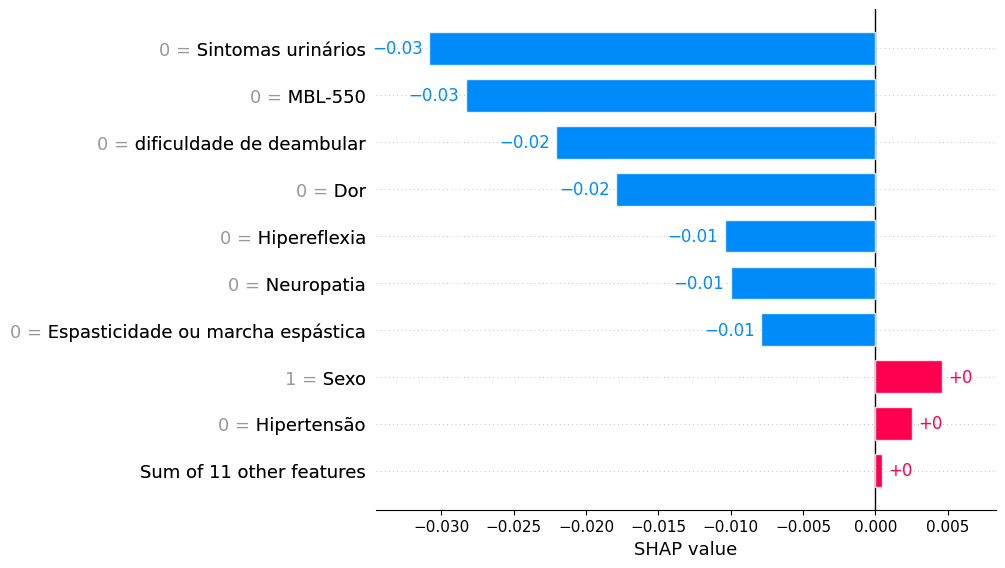

PermutationExplainer explainer: 32it [00:24,  1.38s/it]


Importância das Características do modelo Nearest Neighbors


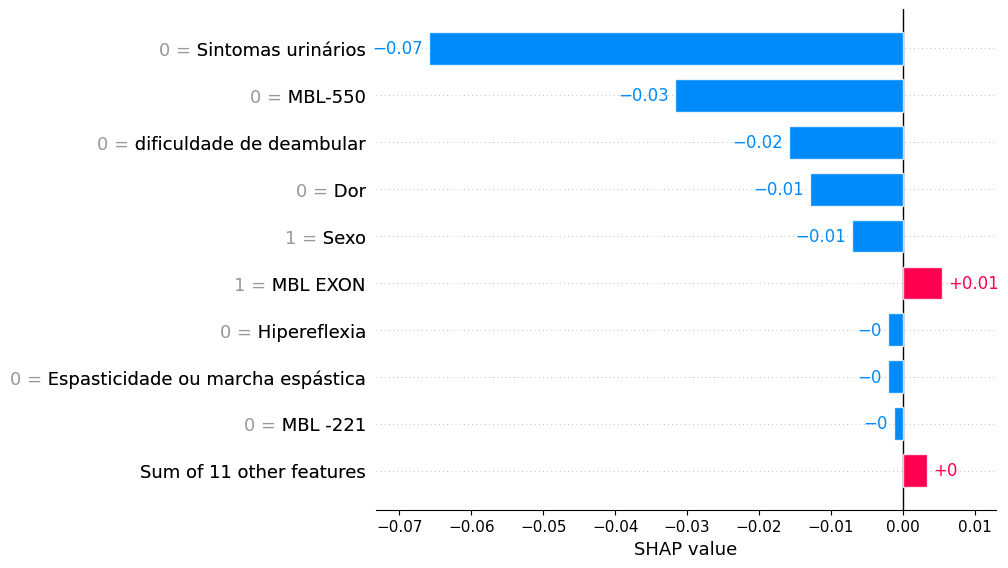

Importância das Características do modelo Decision Tree*


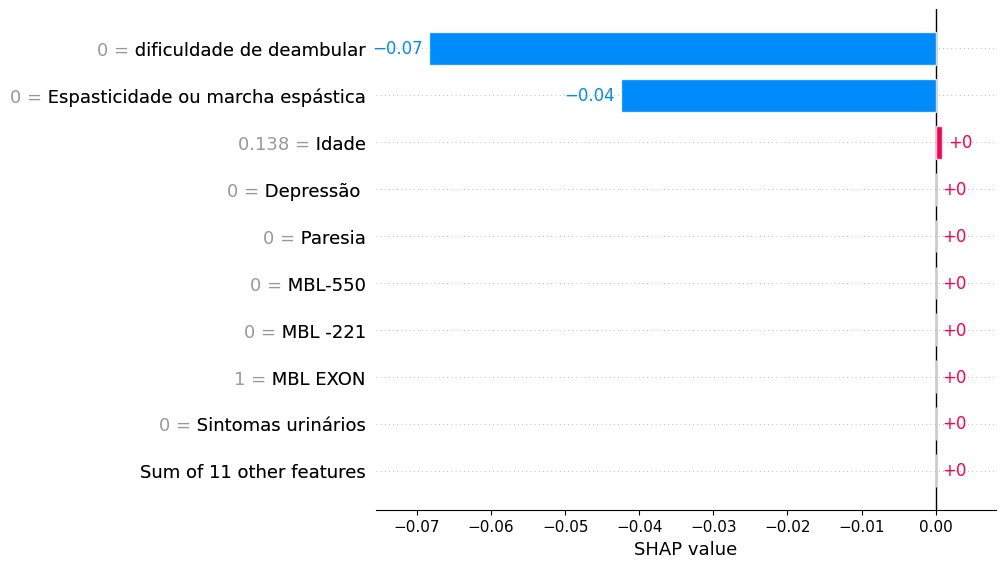

Importância das Características do modelo Random Forest


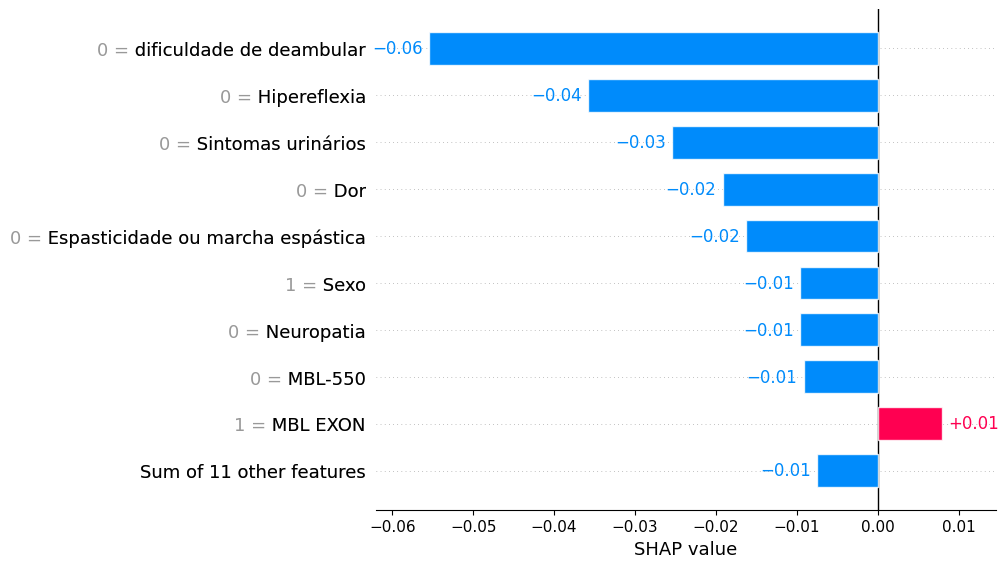

Importância das Características do modelo AdaBoost


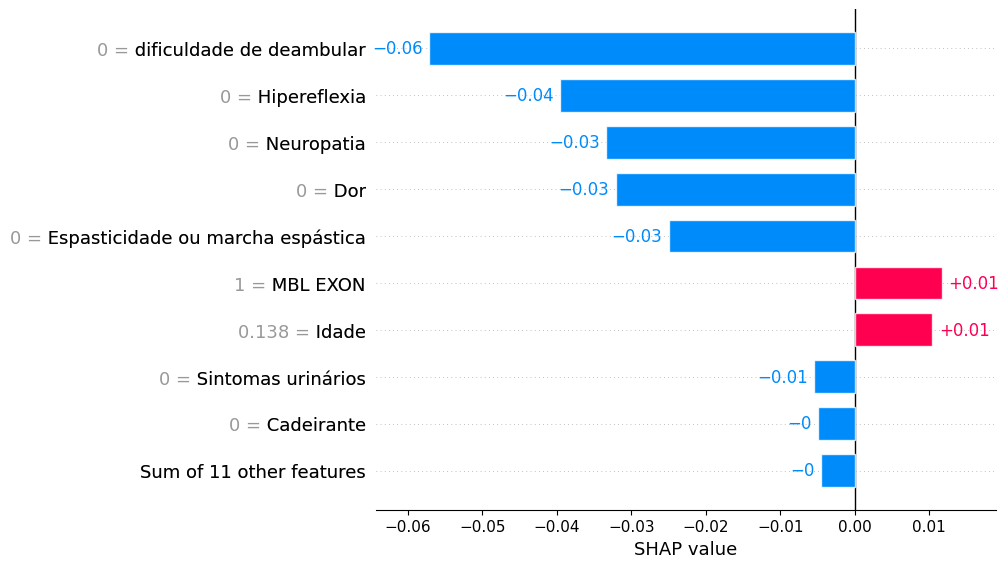

Importância das Características do modelo Gradient Boosting


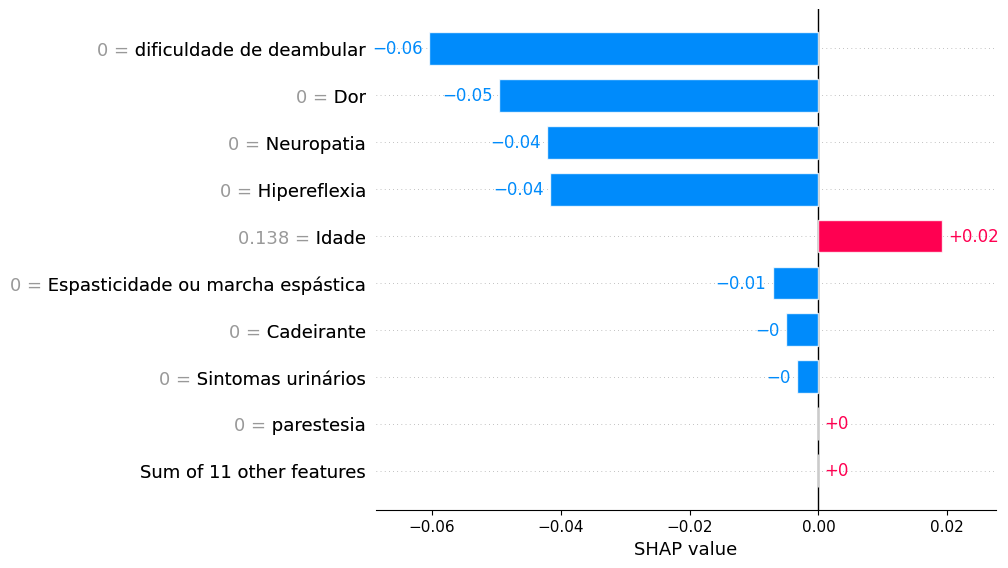

Importância das Características do modelo Naive Bayes


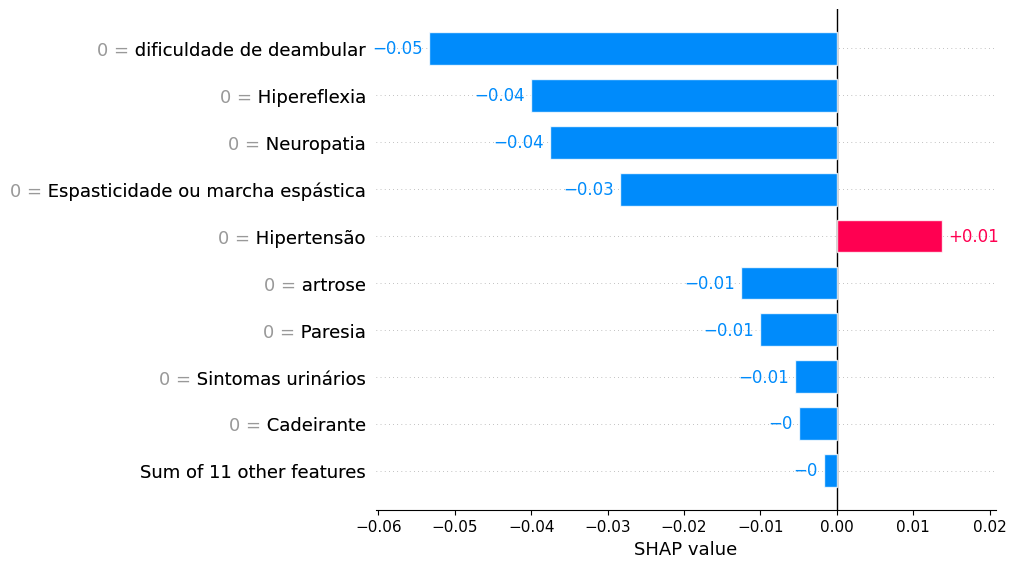

Importância das Características do modelo Linear DA


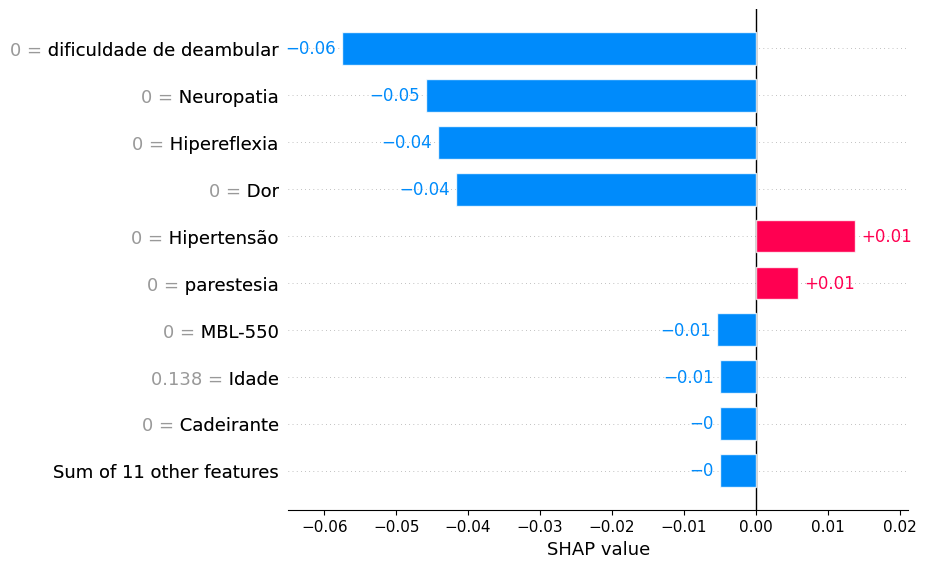

In [ ]:
# Training the classifiers
for item, nome in zip(classifiers, names):
    # Training model
    item.fit(x_train, y_train)

    for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
        x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Create an explainer object
        explainer = shap.Explainer(item.predict, x_train_fold)

        # Calculate SHAP values
        shap_values = explainer(x_test_fold)
        # Plot SHAP summary plot
        print(f'Importância das Características do modelo {nome}')
        shap.plots.bar(shap_values[0]) #x_test_fold, #feature_names=x_train.columns)
        break  # Stop after the first iteration to plot only once for each model
